
# ----------------------------Applied Machine Learning -------------------------------------------------------------------------------------Group - 16 --------------------------------------------------------

<font size=5 color=coral><bold>  Project3_Regression_Group16_Ashish_Manish </bold></font>

## Step - 1 Exploring and Preparing the Data
    Let's Begin by importing all the libraries and loading the dataset

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
import matplotlib.pyplot as plt

# To supress the warnings
import warnings
warnings.filterwarnings("ignore")

data_audit = pd.read_csv(r'C:\Users\nick2\Desktop\MS\Sem-2\ML\Project 2\audit_risk.csv')
data_trial = pd.read_csv(r'C:\Users\nick2\Desktop\MS\Sem-2\ML\Project 2\trial.csv')

     Exploring the datasets a bit 

In [18]:
data_audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [19]:
data_trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [20]:
print('Shape of Audit Dataset {}'.format(data_audit.shape))
print('\nShape of Trial Dataset {}'.format(data_trial.shape))

print('\nColumns in Audit Dataset\n {}'.format(data_audit.columns.values))
print('\nColumns in Trial Dataset\n {}'.format(data_trial.columns.values))

Shape of Audit Dataset (776, 27)

Shape of Trial Dataset (776, 18)

Columns in Audit Dataset
 ['Sector_score' 'LOCATION_ID' 'PARA_A' 'Score_A' 'Risk_A' 'PARA_B'
 'Score_B' 'Risk_B' 'TOTAL' 'numbers' 'Score_B.1' 'Risk_C' 'Money_Value'
 'Score_MV' 'Risk_D' 'District_Loss' 'PROB' 'RiSk_E' 'History' 'Prob'
 'Risk_F' 'Score' 'Inherent_Risk' 'CONTROL_RISK' 'Detection_Risk'
 'Audit_Risk' 'Risk']

Columns in Trial Dataset
 ['Sector_score' 'LOCATION_ID' 'PARA_A' 'SCORE_A' 'PARA_B' 'SCORE_B'
 'TOTAL' 'numbers' 'Marks' 'Money_Value' 'MONEY_Marks' 'District' 'Loss'
 'LOSS_SCORE' 'History' 'History_score' 'Score' 'Risk']


<b> We need to merge both the datasets, before that we need to check if both the dataframes have same values in all the columns <b>

In [21]:
repeated_columns = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value', 'History', 'Score', 'Risk']

for i in repeated_columns:
    a=sum(data_audit[i]==data_trial[i])
    if a==776:
        print('{} column has same values in both dataframes\n'.format(i))

Sector_score column has same values in both dataframes

LOCATION_ID column has same values in both dataframes

PARA_A column has same values in both dataframes

PARA_B column has same values in both dataframes

TOTAL column has same values in both dataframes

numbers column has same values in both dataframes

History column has same values in both dataframes

Score column has same values in both dataframes



In [22]:
a=sum(data_audit['Score_A']==data_trial['SCORE_A']/10)
b=sum(data_audit['Score_B']==data_trial['SCORE_B']/10)
if a==776:
    print('Score_A column has same values in both dataframes\n')
if b==776:
    print('Score_B column has same values in both dataframes')

Score_A column has same values in both dataframes

Score_B column has same values in both dataframes


- <b>Looks like all the columns have same values except Money_Value and Risk columns, Score_A and Score_B are also same except for the fact that in trial.csv both of these columns are divided by 10.</b>

- <b>Let's explore further columns Money_value and Risk</b>

In [23]:
print(sum(data_audit['Money_Value']==data_trial['Money_Value']))
print(sum(data_audit['Risk']==data_trial['Risk']))
print(sum(data_audit['District_Loss']==data_trial['District']))

775
595
776


    - It means there is only value different for Money_Value column in both dataframes and there are 181 values different for Risk column in both dataframes. We will ignore 1 different Value for Money_Value column and keep all the values from audit dataset, For Risk column also we are choosing to go with values in Audit Dataset

    - On Random Comparison we also found that District_Loss column in audit dataset is same as District column in trial dataset, just the column names are different. So as with other columns, we are going with District_Loss column and we will not be including District Column in our final dataset

In [24]:
data_trial['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

# Dropping records from data for which Location ID is non-numeric


In [25]:
data_trial=data_trial[data_trial['LOCATION_ID']!='LOHARU']
data_trial=data_trial[data_trial['LOCATION_ID']!='NUH']
data_trial=data_trial[data_trial['LOCATION_ID']!='SAFIDON']

### Dropping Repeated columns

In [26]:
# Dropping repeated columns from trial dataset in order to prepare it to merge with audit dataset
repeated_columns = ['Sector_score', 'District','LOCATION_ID', 'PARA_A', 'SCORE_A','PARA_B','SCORE_B',
                     'TOTAL', 'numbers','Money_Value','History','Score','Risk']
data_trial.drop(columns=repeated_columns, inplace=True, axis=1)

In [27]:
dataset=pd.concat([data_audit,data_trial], axis=1)

### Finding Null values in the final dataset

In [28]:
dataset.isnull().any()
dataset.dropna(inplace=True)

    Only one missing value was there in a column, so we decided to drop that observation from the data. As there is only one missing value I have decided to drop that observation instead of imputing it.

    Detection_Risk column has only one value for the whole column which is 0.5. It is not going to be helpful in building a model so we are dropping this column from the dataset.
    
    Also We are dropping Location_Id column as it is not going explain any variation in the dependent variable

In [29]:
dataset.drop(columns=['Detection_Risk','LOCATION_ID'],inplace=True,axis=1)

### Let's find out if we have any high correlations between independent variables

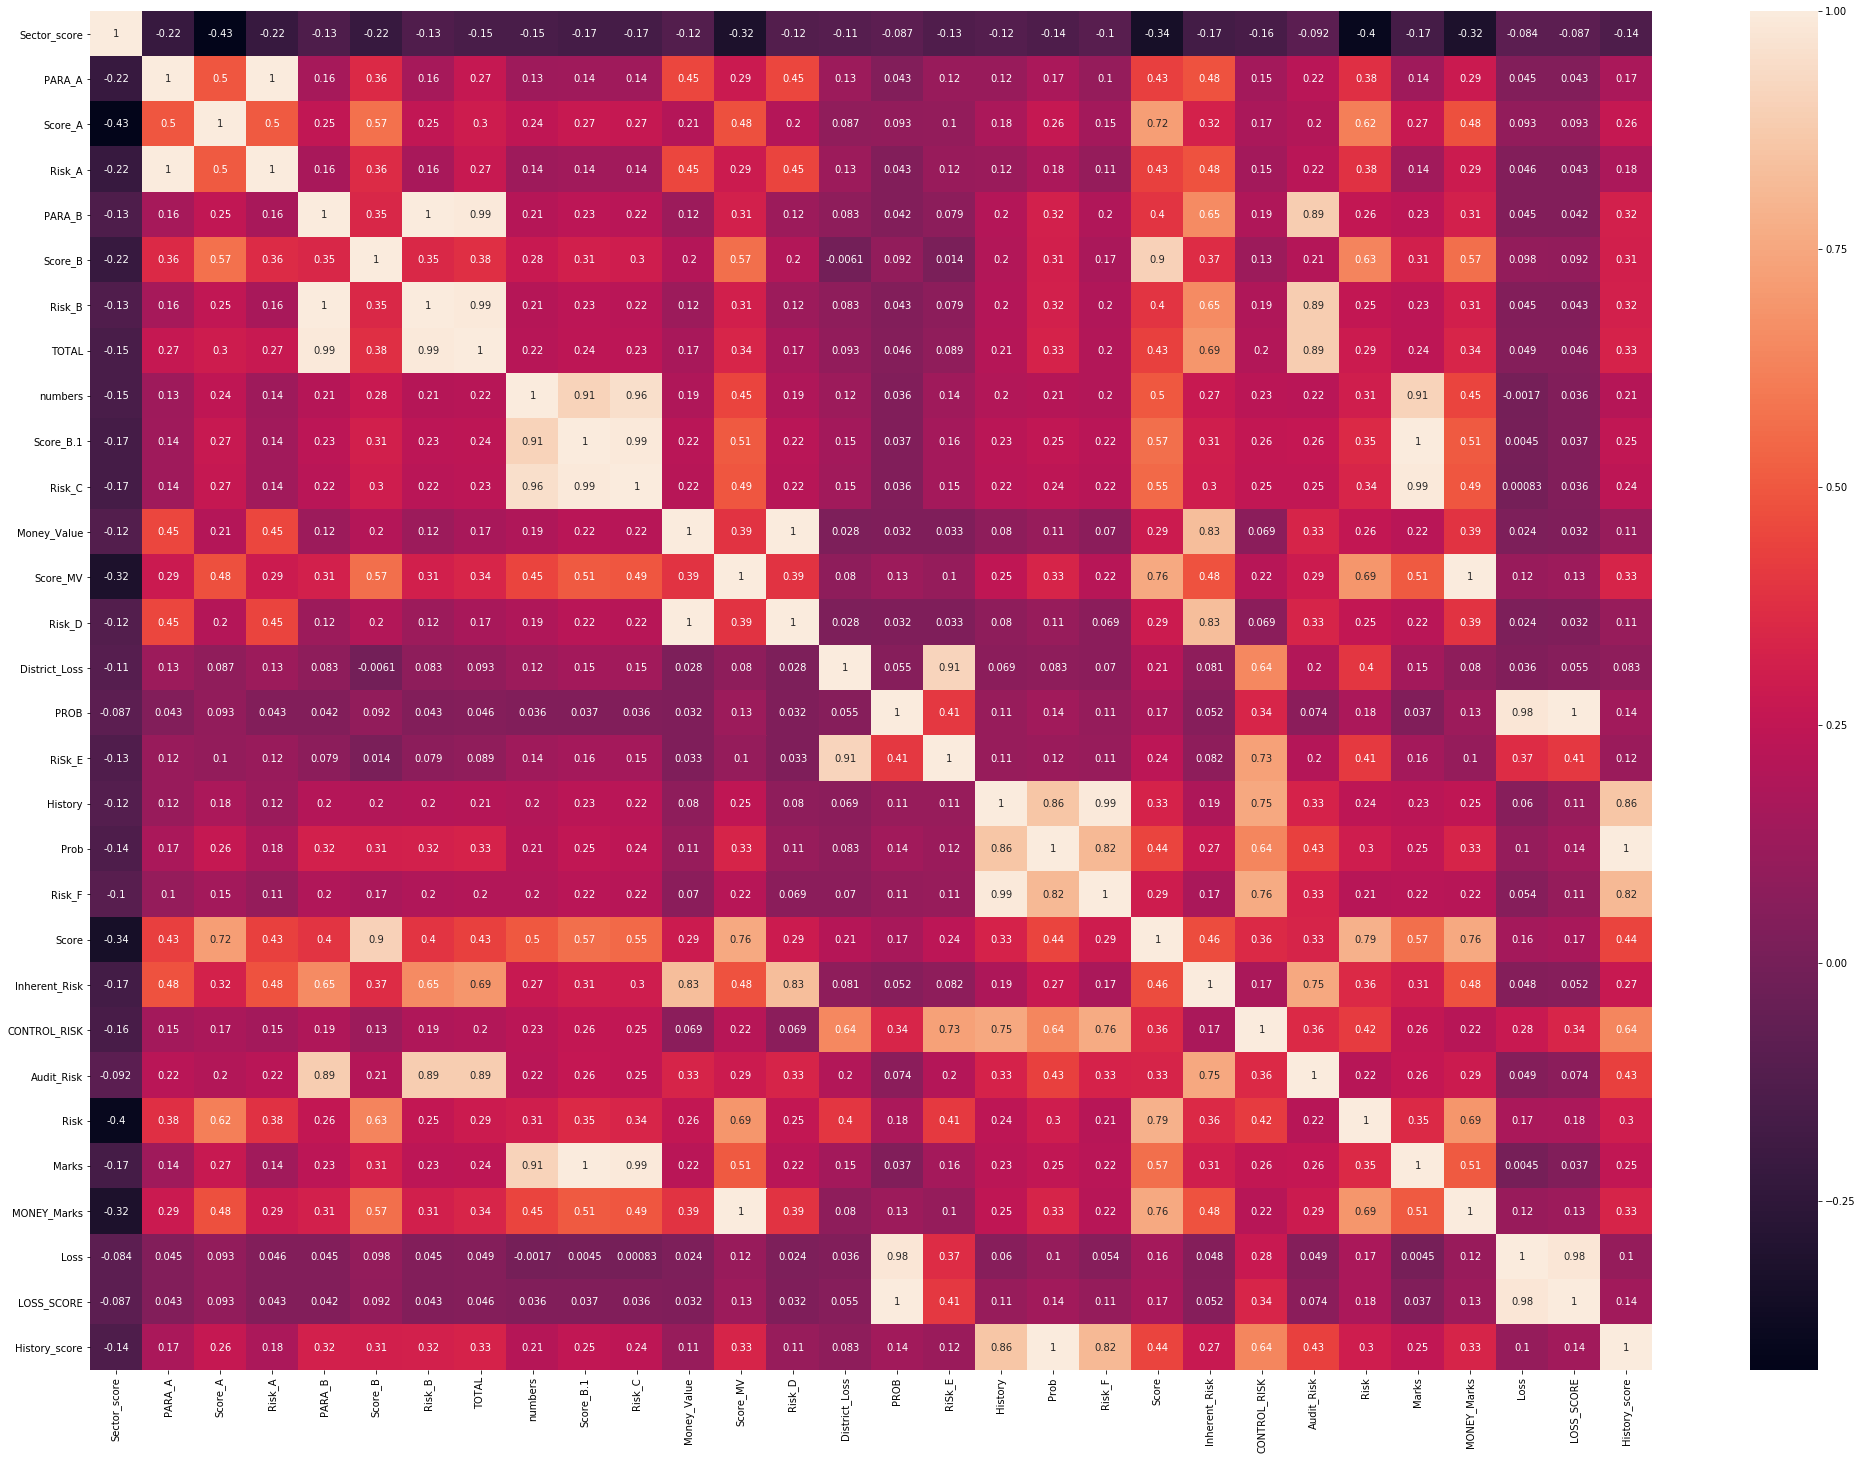

In [30]:
plt.figure(figsize=(35,25)) 
sns.heatmap(dataset.corr(), annot=True) 

- We have found some perfect correlations and on digging futher into the linear dependencies and correlations we have decided to take below actions 
- Few other dependencies we have discovered and we are keeping one out of the two columns
- We are keeping Marks, History_score, MONEY_Marks and Loss, and dropping Score_B.1,Prob, PROB, LOSS_SCORE and Score_MV as these columns are nothing but derived from the former columns only and will not help much in explaining the variation in the dependent variable

In [31]:
print(sum(dataset['Score_B.1']*10==dataset['Marks']))
print(sum(dataset['History_score']/10==dataset['Prob']))
print(sum(dataset['LOSS_SCORE']/10==dataset['PROB']))
print(sum(dataset['Score_MV']*10==dataset['MONEY_Marks']))
print(sum(dataset['Loss']==dataset['LOSS_SCORE']-2))

772
772
772
772
750


In [32]:
dataset.drop(columns=['Score_B.1','Prob', 'PROB', 'Score_MV','LOSS_SCORE'],inplace=True,axis=1)

- We found another interesting relationship among columns in the data, where Risk A added upto Risk E is the total Inherent Risk, so We are dropping Risk A, Risk B, Risk C, Risk D, Risk E and Risk F and keeping Inherent Risk. 
- Firstly we do not want any Linear Dependency and secondly it will increase the computational efficiency.

In [33]:
a=dataset['Risk_A']+dataset['Risk_B']+dataset['Risk_C']+dataset['Risk_D']+dataset['RiSk_E']+dataset['Risk_F']
df=pd.concat([a,dataset['Inherent_Risk']],axis=1)
df=df.round(3)
sum(df[0]==df['Inherent_Risk'])


# for 773 rows out of 775 Sum of Risk A to RIsk F equals Inherent RIsk

770

In [34]:
dataset.drop(columns=['Risk_A','Risk_B','Risk_C','Risk_D','RiSk_E','Risk_F'],axis=1, inplace=True)

In [35]:
dataset.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL',
       'numbers', 'Money_Value', 'District_Loss', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Risk', 'Marks',
       'MONEY_Marks', 'Loss', 'History_score'],
      dtype='object')

### Exploring the data 
By exploring we are trying to check for different type of data we have in our dataset. For exploring we are using decribe() function. 

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 775
Data columns (total 19 columns):
Sector_score     772 non-null float64
PARA_A           772 non-null float64
Score_A          772 non-null float64
PARA_B           772 non-null float64
Score_B          772 non-null float64
TOTAL            772 non-null float64
numbers          772 non-null float64
Money_Value      772 non-null float64
District_Loss    772 non-null int64
History          772 non-null int64
Score            772 non-null float64
Inherent_Risk    772 non-null float64
CONTROL_RISK     772 non-null float64
Audit_Risk       772 non-null float64
Risk             772 non-null int64
Marks            772 non-null float64
MONEY_Marks      772 non-null float64
Loss             772 non-null float64
History_score    772 non-null float64
dtypes: float64(16), int64(3)
memory usage: 120.6 KB


In [37]:
dataset.describe()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,Loss,History_score
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,20.209404,2.460869,0.352073,10.855947,0.313731,13.284950,5.068005,14.191093,2.507772,0.104922,2.706218,17.764268,0.573575,7.203708,0.395078,2.238342,2.914508,0.029793,2.168394
std,24.322215,5.691631,0.174163,50.207317,0.170048,51.437422,0.265089,66.730436,1.231321,0.532353,0.859652,54.869671,0.445559,38.764503,0.489184,0.805417,1.600242,0.184745,0.681523
min,1.850000,0.000000,0.200000,0.000000,0.200000,0.000000,5.000000,0.000000,2.000000,0.000000,2.000000,1.400000,0.400000,0.280000,0.000000,2.000000,2.000000,0.000000,2.000000
25%,2.370000,0.207500,0.200000,0.000000,0.200000,0.555000,5.000000,0.000000,2.000000,0.000000,2.000000,1.584000,0.400000,0.316800,0.000000,2.000000,2.000000,0.000000,2.000000
50%,3.890000,0.880000,0.200000,0.415000,0.200000,1.395000,5.000000,0.090000,2.000000,0.000000,2.400000,2.220000,0.400000,0.579600,0.000000,2.000000,2.000000,0.000000,2.000000
75%,55.570000,2.482500,0.600000,4.170000,0.400000,7.767500,5.000000,5.630000,2.000000,0.000000,3.400000,10.782000,0.400000,3.262500,1.000000,2.000000,4.000000,0.000000,2.000000
max,59.850000,85.000000,0.600000,1264.630000,0.600000,1268.910000,9.000000,935.030000,6.000000,9.000000,5.200000,801.262000,5.800000,961.514400,1.000000,6.000000,6.000000,2.000000,6.000000


In [38]:
dataset.shape

(772, 19)

## Step - 2 : Visualizing the Data 

We are plotting histograms for different variables to understand the distribution of data. This will help us in understanding the operations to be performed. For checking the collinearity we are ploting heat map which will help us in understanding which variables are collinear.

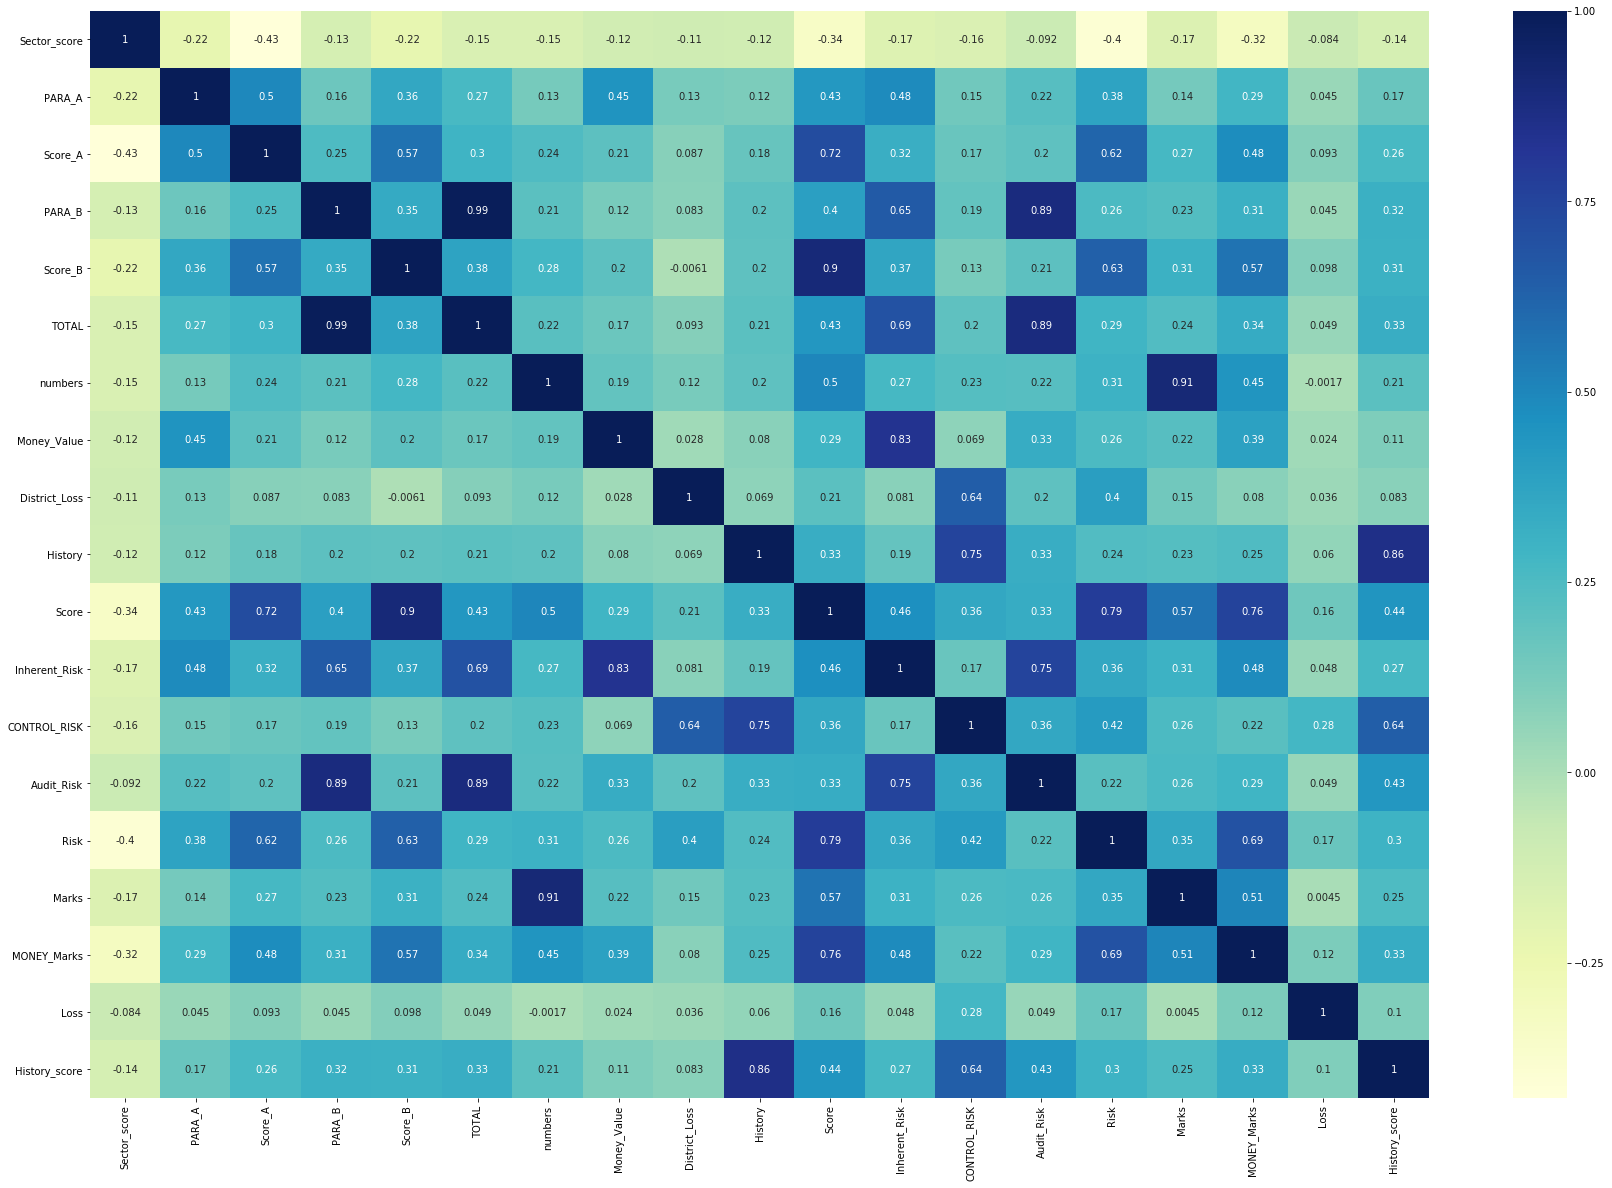

In [39]:
plt.figure(figsize=(30,20)) 
sns.heatmap(dataset.corr(), annot=True,  cmap="YlGnBu") 

    The heatmap details the correlation among all the variables. Based on the color we can understand how various variables are correlated with our depedent variable 

## Histogram distribution of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243ABAE0C50>,
      dtype=object)

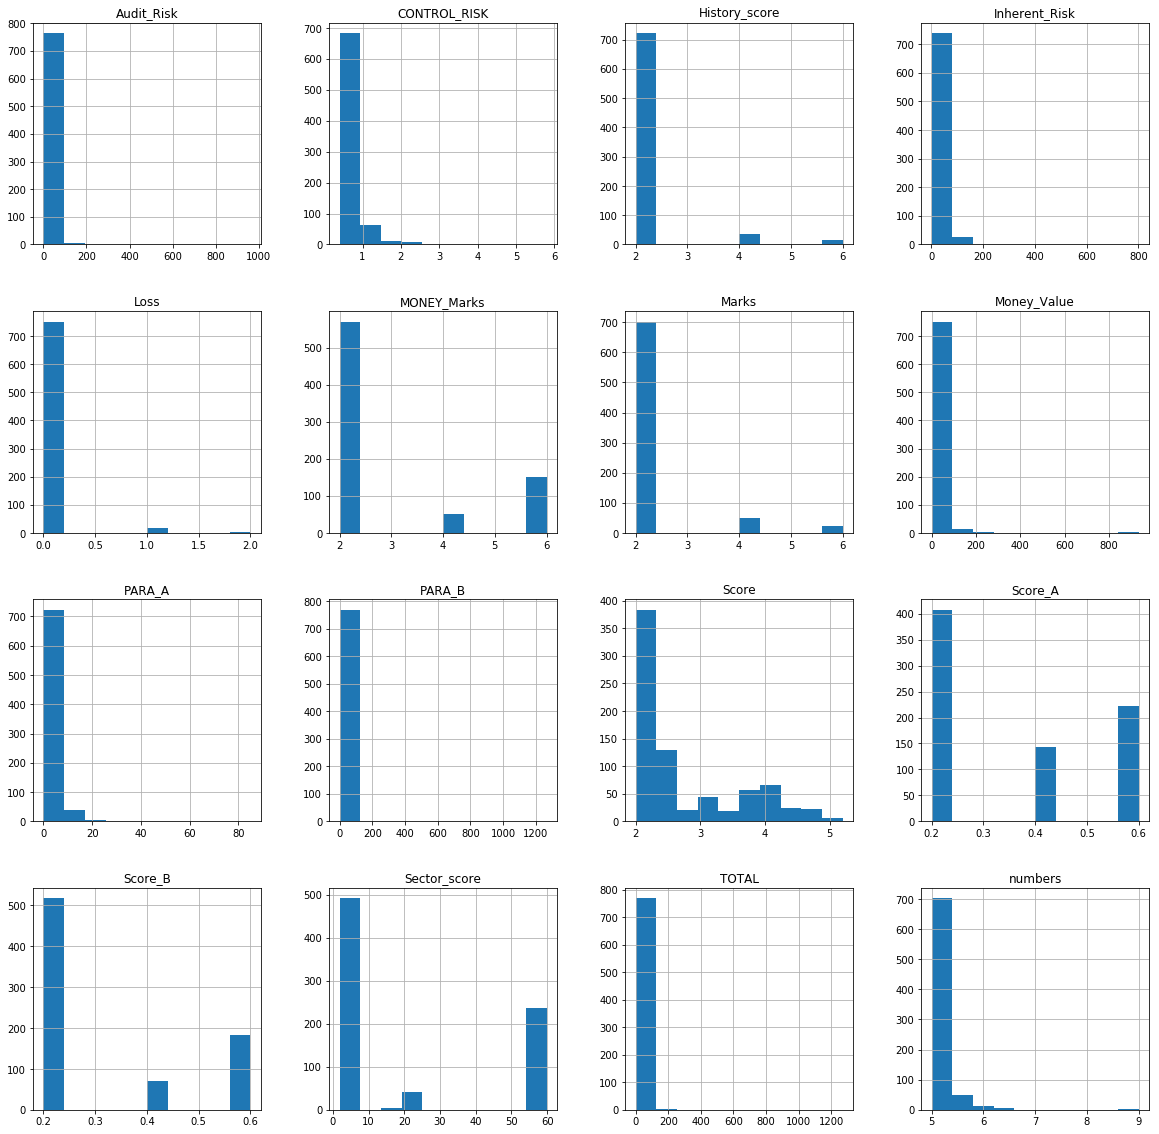

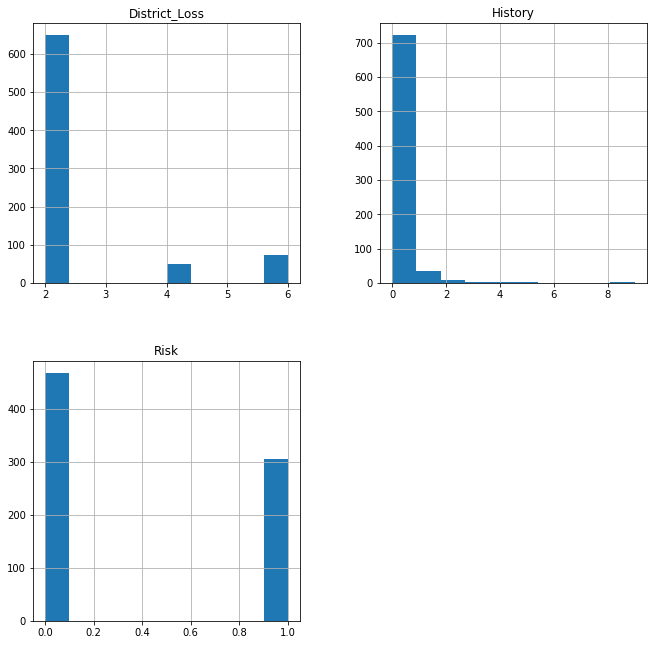

In [40]:
dataset[dataset.dtypes[(dataset.dtypes=="float")].index.values].hist(figsize=[20,20])
dataset[dataset.dtypes[(dataset.dtypes=="int64")].index.values].hist(figsize=[11,11])

    The plots indicate the distribution of the data. The distribution is helpful in understanding the structure of the data and deciding on the scaling that needs to be undertaken on the data. 
    The plotting of the variables indicate that the data is distributed in various scales. 
    There is a need to bring the variables on a similar scale, as not doing so will result in supperssion of weaker variables.
    
    We have also plotted few pairplots using seaborn, to understand how different variables are assoiated with each other and how they vary with the target variable for classification i.e. Risk


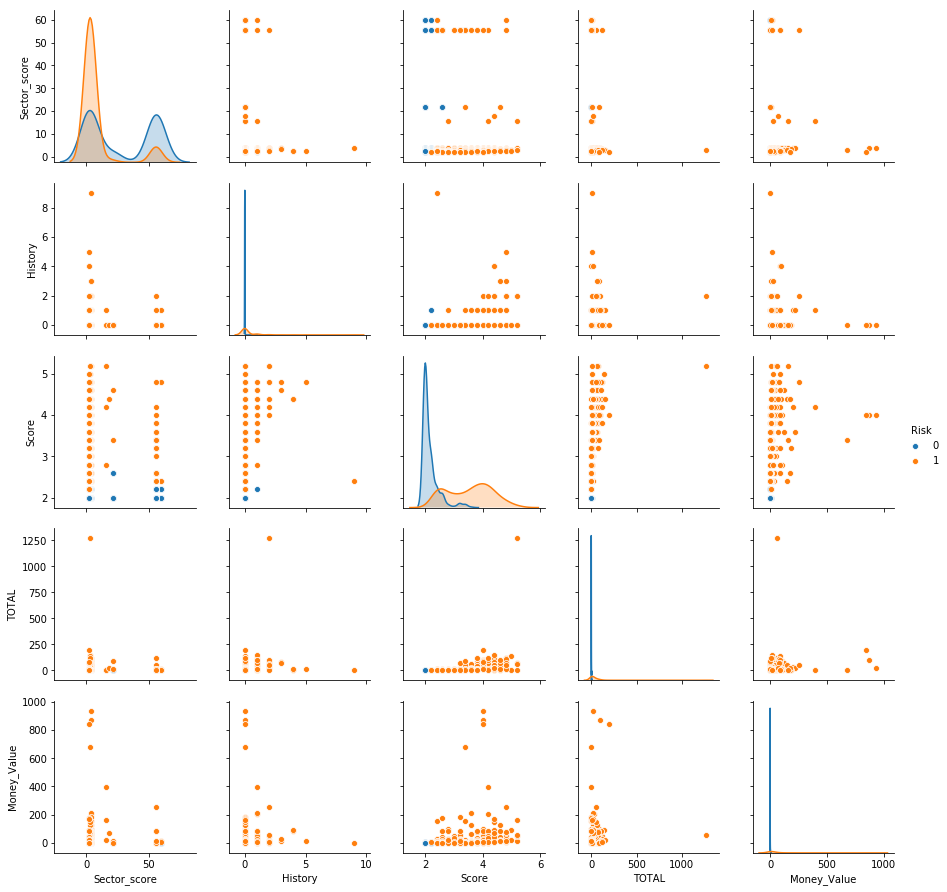

In [41]:
sns.pairplot(dataset, hue = 'Risk', vars = ['Sector_score','History','Score', 'TOTAL', 'Money_Value'])


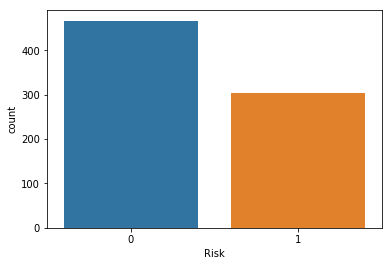

In [42]:
sns.countplot(dataset['Risk'], label = "Count") 

    We wanted to make sure that the data we are working with is not unbalanced, with the count of target variable, looks like we do not need to balance the dataset.

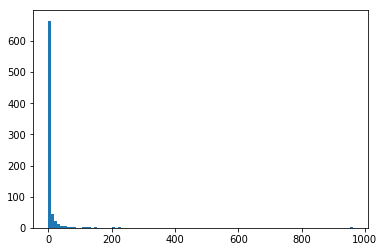

In [43]:
plt.hist(dataset['Audit_Risk'],bins=100)
plt.show()

    We can see a few outliers and we need to get rid of those, We have decided to drop values greater than 100 for Audit_Risk from our dataset to get rid of these outliers

In [44]:
dataset=dataset[dataset['Audit_Risk']<100]
X=dataset.drop(columns=['Audit_Risk','Risk'],axis=1)
y=dataset['Audit_Risk']

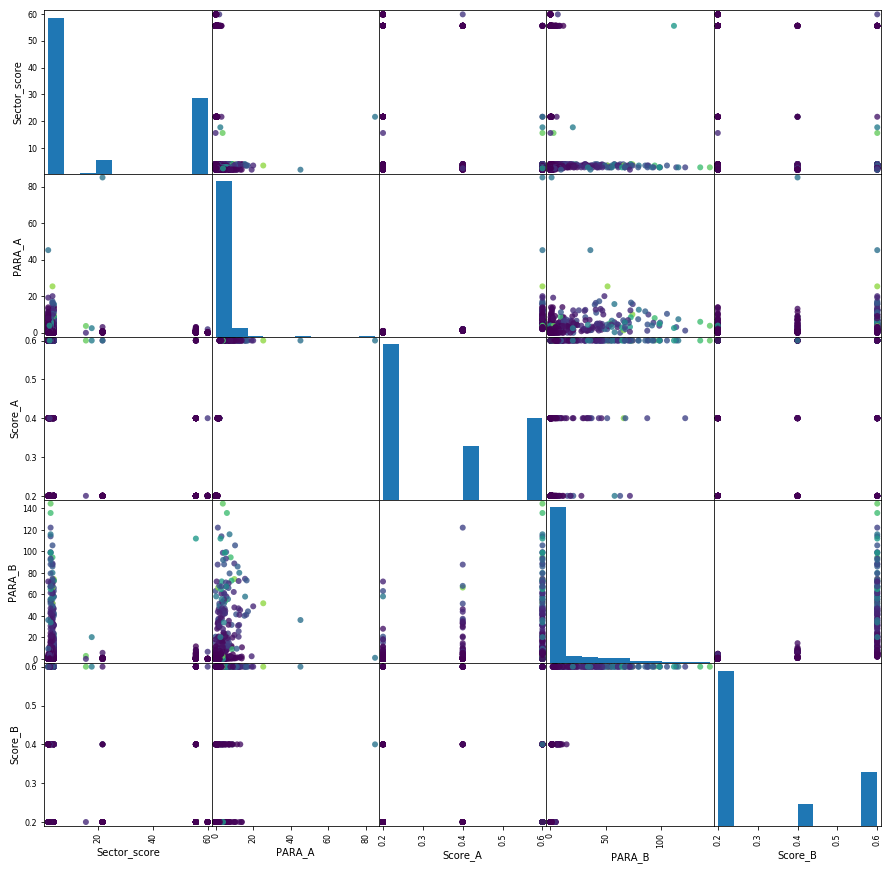

In [45]:
from pandas.plotting import scatter_matrix
attributes = X.columns.values[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')
plt.show()

## Step - 3 Model Training and Evaluation

## Regression Task
#### Splitting into train and test

In [46]:
X=dataset.drop(columns=['Audit_Risk','Risk'],axis=1)
y=dataset['Audit_Risk']

In [47]:
X.head()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Marks,MONEY_Marks,Loss,History_score
0,3.89,4.18,0.6,2.50,0.2,6.68,5.0,3.38,2,0,2.4,8.574,0.4,2.0,2.0,0.0,2.0
1,3.89,0.00,0.2,4.83,0.2,4.83,5.0,0.94,2,0,2.0,2.554,0.4,2.0,2.0,0.0,2.0
2,3.89,0.51,0.2,0.23,0.2,0.74,5.0,0.00,2,0,2.0,1.548,0.4,2.0,2.0,0.0,2.0
3,3.89,0.00,0.2,10.80,0.6,10.80,6.0,11.75,2,0,4.4,17.530,0.4,6.0,6.0,0.0,2.0
4,3.89,0.00,0.2,0.08,0.2,0.08,5.0,0.00,2,0,2.0,1.416,0.4,2.0,2.0,0.0,2.0


In [48]:
y.head()

0    1.7148
1    0.5108
2    0.3096
3    3.5060
4    0.2832
Name: Audit_Risk, dtype: float64

In [49]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
X_train_unscaled.head()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Marks,MONEY_Marks,Loss,History_score
283,2.37,3.61,0.6,2.130,0.6,5.740,5.0,5.41,2,2,4.4,8.6080,2.0,2.0,4.0,1.0,6.0
459,1.85,7.07,0.6,0.720,0.2,7.790,5.0,0.00,2,0,2.4,5.7860,0.4,2.0,2.0,0.0,2.0
336,2.37,0.01,0.2,0.007,0.2,0.017,5.0,0.00,2,0,2.0,1.4034,0.4,2.0,2.0,0.0,2.0
644,55.57,0.49,0.2,0.000,0.2,0.490,5.0,0.00,2,0,2.0,1.4980,0.4,2.0,2.0,0.0,2.0
184,3.41,0.43,0.2,0.000,0.2,0.430,5.0,0.00,2,0,2.0,1.4860,0.4,2.0,2.0,0.0,2.0


In [51]:
X_train_unscaled.shape

(611, 17)

In [52]:
y_train.shape

(611,)

### Scaling the Data
- Scaling the data using StandardScaler
- Standard Scalar works well with Regression 

(-1, 2.5)

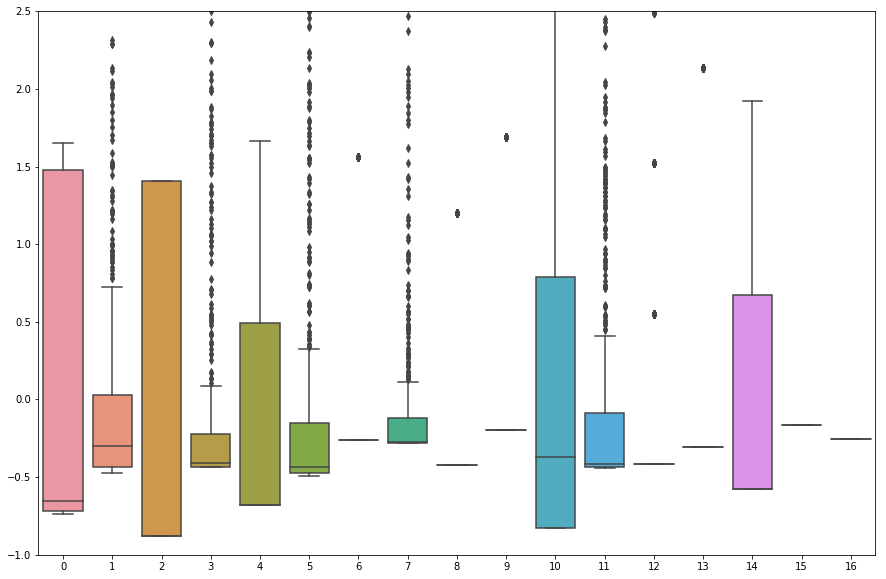

In [53]:
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train_unscaled)
X_test=standard_scaler.transform(X_test_unscaled)

x2=pd.DataFrame(X_train)
plt.figure(figsize=(15,10))
sns.boxplot(data = x2)
plt.ylim(-1,2.5)

<font color=violet>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

<font color=coral size=6> Applying different Regression models</font>

## i) Bagging




- <font color=maroon size=4> Bagging with Decision Tree </font>

 <font color=tomato size=3>1. Training on a single Decision Tree and then using Aggregate Bootstraping</font>


In [54]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
bag_reg = BaggingRegressor(dt, n_estimators=500, max_samples=200, bootstrap=True, random_state=0,oob_score=True)

# 500 patches out of the dataset
# max_samples =100, number of samples in a classifier
# bootstrap = bagging/pasting ; =True is bagging i.e. with replacement select the samples
# oob: the left out sample score
# On an average only 63% of the data is selected in total

bag_reg.fit(X_train, y_train)
dt.fit(X_train,y_train)
y_pred = bag_reg.predict(X_test)

print('Model-01 using Decision Tree for Bagging\n')
print('Train score with bagging: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with bagging: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score decision Tree: {:.2f}'.format(dt.score(X_train, y_train)))
print('Test score decision Tree: {:.2f}\n'.format(dt.score(X_test, y_test)))
print('Out of Bag score: {:.2f}'.format(bag_reg.oob_score_))

Model-01 using Decision Tree for Bagging

Train score with bagging: 0.93
Test score with bagging: 0.91

Train score decision Tree: 1.00
Test score decision Tree: 0.98

Out of Bag score: 0.87


- With Decision Tree , we are getting a Train score of 1 and a test score 0f 0.92, clearly the model is overfitting the data
- Using Bagging, we are getting Train score 0f 0.93 and test score of 0.89 which is far more generalized than what we got with a single decision tree

<font color=tomato size=3> 2. Finding best parameteters for Bagging of Decision Tree Regressor using GridSearch Cross Validation </font>

In [55]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(random_state=0),bootstrap=True, oob_score=True, random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 400, 'n_estimators': 800}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

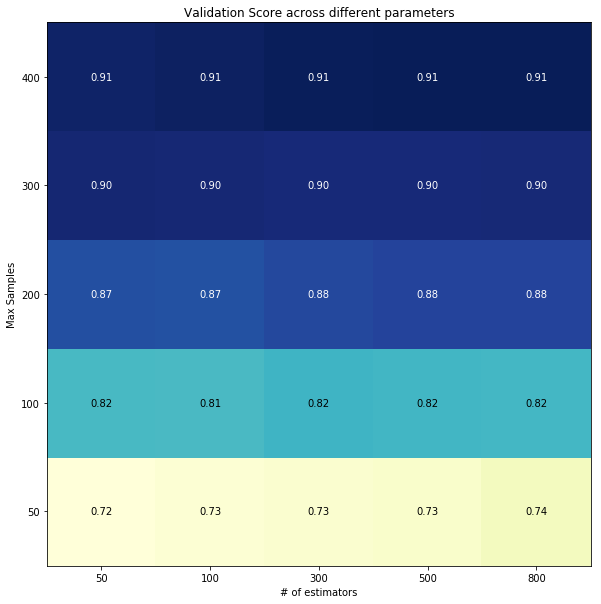

In [56]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="YlGnBu") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

In [57]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

Train score: 0.9726954394048724
Test score: 0.9532587413278227


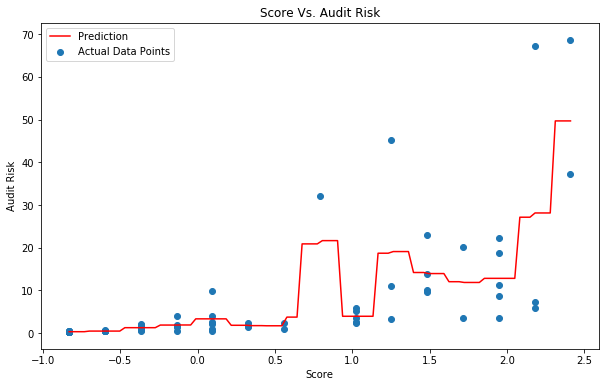

In [58]:
X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(DecisionTreeRegressor(random_state=0), n_estimators=300, bootstrap=True, 
                           random_state=0,oob_score=True)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

- <font color=maroon size=4> Bagging with KNN </font>

 <font color=tomato size=3>1. Training on a single KNN and then using Aggregate Bootstraping</font>


In [59]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(3)
bag_reg = BaggingRegressor(knn, n_estimators=500, bootstrap=True, random_state=0,oob_score=True)

bag_reg.fit(X_train, y_train)
knn.fit(X_train,y_train)

print('Model-02 using KNN for Bagging\n')
print('Train score with bagging: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with bagging: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score KNN: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test score KNN: {:.2f}\n'.format(knn.score(X_test, y_test)))
print('Out of Bag score: {:.2f}'.format(bag_reg.oob_score_))

Model-02 using KNN for Bagging

Train score with bagging: 0.89
Test score with bagging: 0.86

Train score KNN: 0.87
Test score KNN: 0.87

Out of Bag score: 0.75


- With KNN, we are getting a Train score of 0.90 and a test score 0f 0.72, clearly the model is underfitting the data
- Using Bagging, we are getting Train score of 0.90 and test score of 0.75 which shows a slight improvement in test score but we need to find the best parameters to fine tune the model

<font color=tomato size=3> 2. Finding best parameteters for Bagging of KNN Regressor using GridSearch Cross Validation </font>

In [60]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(KNeighborsRegressor(3),bootstrap=True, oob_score=True, random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 400, 'n_estimators': 500}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

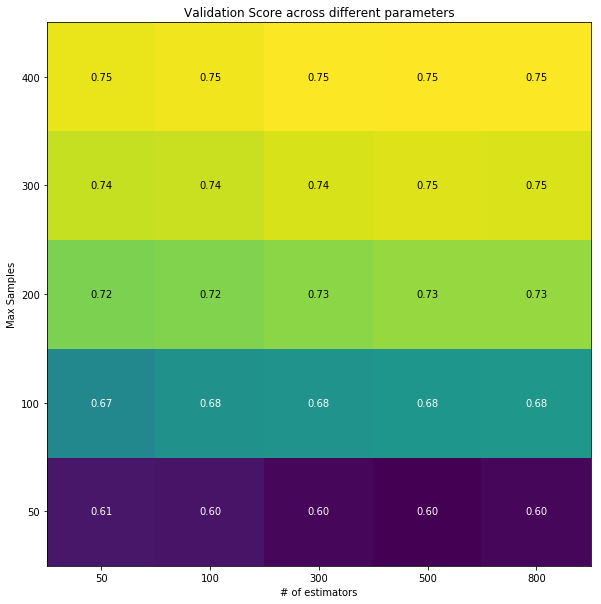

In [61]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.8451766179012112
Test score: 0.8333821603188667


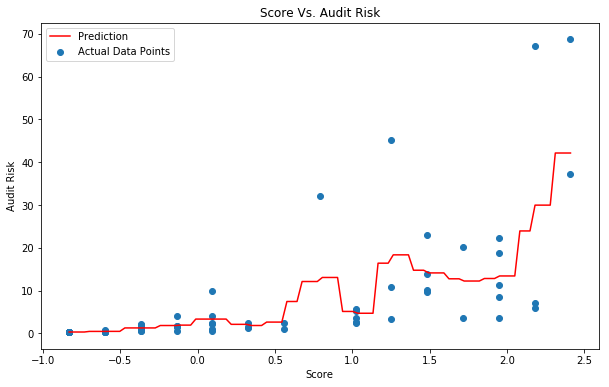

In [62]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(KNeighborsRegressor(3), n_estimators=800, bootstrap=True, 
                           random_state=0,oob_score=True)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()


<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

# ii) Pasting

- <font color=green size=4> Pasting with Decision Tree </font>

 <font color=tomato size=3>1. Training on a single Decision Tree and then using Aggregate Bagging</font>

In [63]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
bag_reg = BaggingRegressor(dt, n_estimators=500, max_samples=200, bootstrap=False, random_state=0)

bag_reg.fit(X_train, y_train)
dt.fit(X_train,y_train)
y_pred = bag_reg.predict(X_test)

print('Model-03 using Decision Tree for Pasting\n')
print('Train score with pasting: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with pasting: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score decision Tree: {:.2f}'.format(dt.score(X_train, y_train)))
print('Test score decision Tree: {:.2f}\n'.format(dt.score(X_test, y_test)))

Model-03 using Decision Tree for Pasting

Train score with pasting: 0.95
Test score with pasting: 0.93

Train score decision Tree: 1.00
Test score decision Tree: 0.98



- With single Decision tree, we are getting a Train score of 1 and a test score 0f 0.92, clearly the model is overfitting the data
- Using Pasting, we are getting Train score of 0.95 and test score of 0.90 which is far more generalized than what we got with a single Decision Tree
- We were getting better results with Bagging as compared to Pasting

<font color=tomato size=3> 2. Finding best parameteters for Pasting of Decision Tree Regressor using GridSearch Cross Validation </font>

In [64]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(random_state=0),bootstrap=False,random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 300, 'n_estimators': 800}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

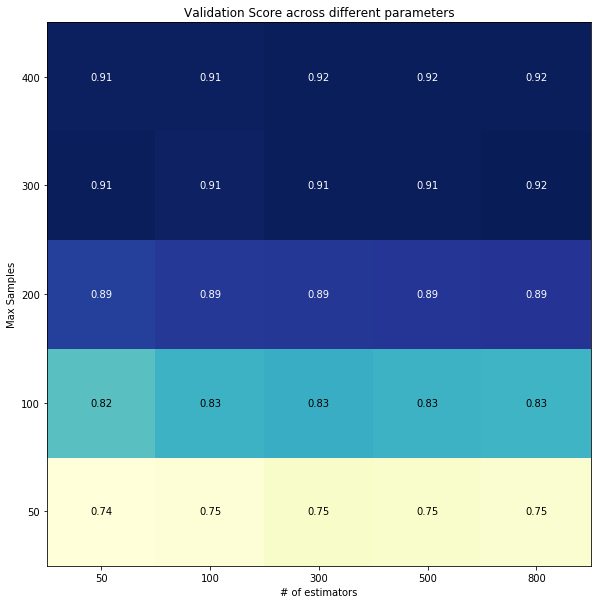

In [65]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="YlGnBu") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.9749669950696934
Test score: 0.955833077825166


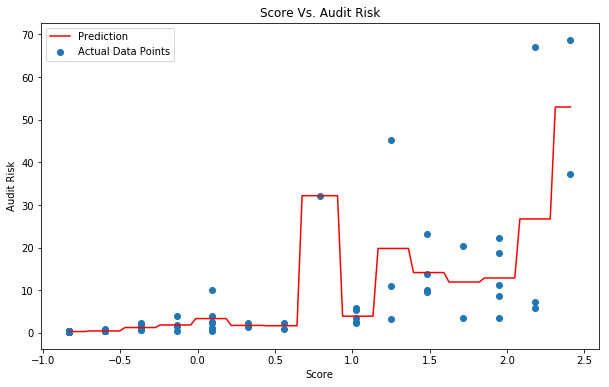

In [66]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(DecisionTreeRegressor(random_state=0), n_estimators=100, bootstrap=False, random_state=0)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

- <font color=green size=4> Pasting with KNN </font>

 <font color=tomato size=3>1. Training on a single KNN and then using Pasting</font>


In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(3)
bag_reg = BaggingRegressor(knn, n_estimators=500, bootstrap=False, random_state=0)

bag_reg.fit(X_train, y_train)
knn.fit(X_train,y_train)

print('Model-04 using KNN for Pasting\n')
print('Train score with pasting: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score with pasting: {:.2f}\n'.format(bag_reg.score(X_test, y_test)))
print('Train score KNN: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test score KNN: {:.2f}\n'.format(knn.score(X_test, y_test)))

Model-04 using KNN for Pasting

Train score with pasting: 0.87
Test score with pasting: 0.87

Train score KNN: 0.87
Test score KNN: 0.87



- With single KNN, we are getting a Train score of 0.90 and a test score 0f 0.72, clearly the model is not fitting the data well
- Using Pasting, we are getting same results, which means pasting is not helping as bagging was.
- Generally we get better results with bagging as compared to pasting but let's tune the model and see if it improves somewhat

<font color=tomato size=3> 2. Finding best parameteters for Pasting of KNN Regressor using GridSearch Cross Validation </font>

In [68]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(KNeighborsRegressor(3),bootstrap=False, random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 400, 'n_estimators': 300}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

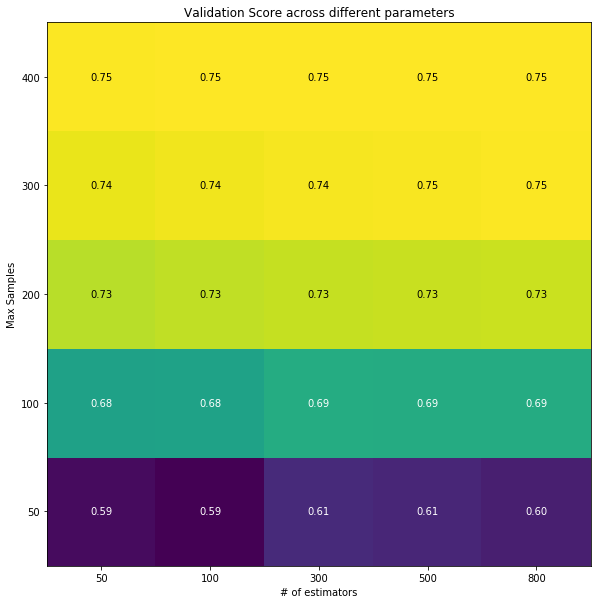

In [69]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.8489472169109931
Test score: 0.8436102091831119


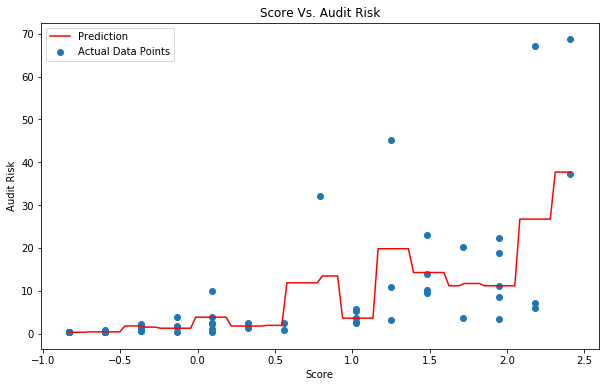

In [70]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(KNeighborsRegressor(3), n_estimators=300, bootstrap=False, random_state=0)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

## iii) Adaboost


- <font color=purple size=4> Adaboost with Decision Tree </font>


<font color=tomato size=3>1. Training on a single Decision Tree and then using Adaboost</font>

In [71]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, learning_rate=0.3, random_state=0)
ada_reg.fit(X_train, y_train)

dt=DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
print('Train score with Adaboost: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(ada_reg.score(X_test, y_test)))
print('Train score with Decision Tree: {:.2f}'.format(dt.score(X_train, y_train)))
print('Test score with Decision Tree: {:.2f}'.format(dt.score(X_test, y_test)))

Train score with Adaboost: 0.96
Test score with Adaboost: 0.91

Train score with Decision Tree: 0.90
Test score with Decision Tree: 0.89


- With a weak learner Decision Tree with maxiumum depth 3, we are getting Train score of 0.91 and test score of 0.84.
- When put into adaboost regressor, with a low learning rate, it is more efficient and able to reduce bias/performance, getting train score of 0.96 and a test score 0f 0.89

<font color=tomato size=3> 2. Finding best parameteters Adaboost using GridSearch Cross Validation </font>

In [72]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,200,300,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'learning_rate': 0.3, 'n_estimators': 50}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

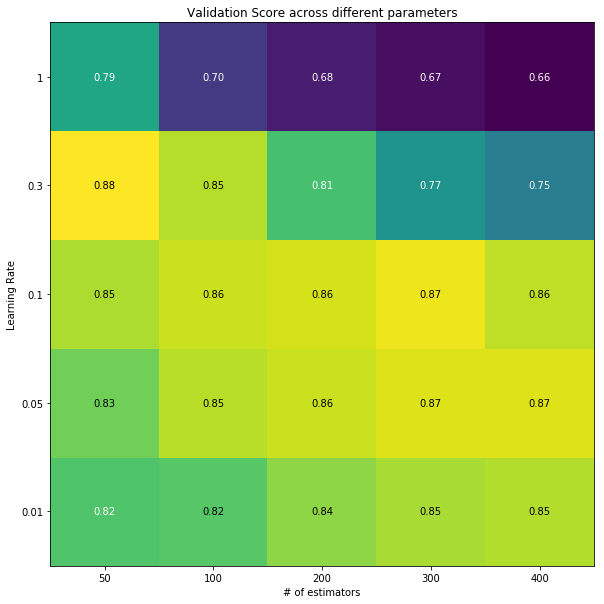

In [73]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Learning Rate',
                      yticklabels=param_dist['learning_rate'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.9589925377313063
Test score: 0.9281698461261424


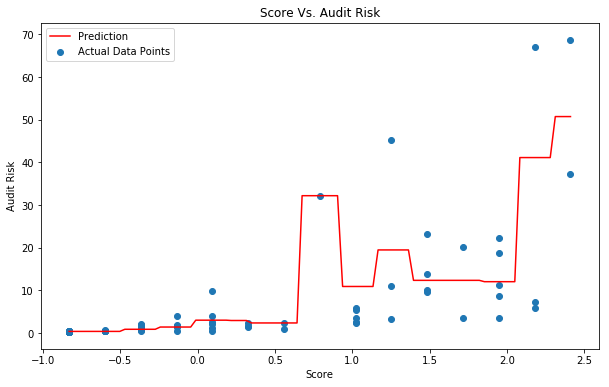

In [74]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=50, learning_rate=0.3, random_state=0)
ada_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = ada_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

- <font color=purple size=4> Adaboost with Linear SVR </font>

<font color=tomato size=3>1. Training on Linear SVR and then using Adaboost</font>

In [75]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR

ada_reg = AdaBoostRegressor(LinearSVR(), n_estimators=100, learning_rate=0.1, random_state=0)
ada_reg.fit(X_train, y_train)

svr=LinearSVR(random_state=0)
svr.fit(X_train, y_train)
print('Train score with Adaboost: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(ada_reg.score(X_test, y_test)))
print('Train score with SVR: {:.2f}'.format(svr.score(X_train, y_train)))
print('Test score with SVR: {:.2f}'.format(svr.score(X_test, y_test)))

Train score with Adaboost: 0.89
Test score with Adaboost: 0.86

Train score with SVR: 0.79
Test score with SVR: 0.84


- Adaboost is giving us better results than a single Linear SVR, let's see if the performance can be improved by fine tuning the parameters

<font color=tomato size=3> 2. Finding best parameteters Adaboost using GridSearch Cross Validation </font>

In [76]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,200,300,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(AdaBoostRegressor(LinearSVR(), random_state=0),param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'learning_rate': 0.01, 'n_estimators': 100}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

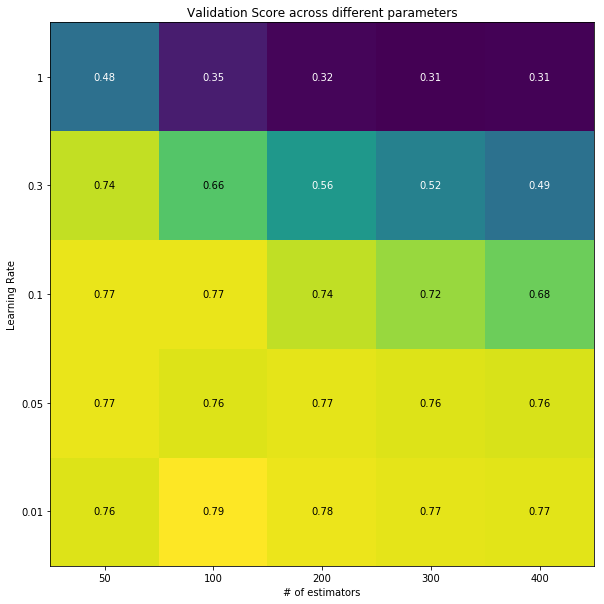

In [77]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Learning Rate',
                      yticklabels=param_dist['learning_rate'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.8430948785200706
Test score: 0.8734963909159474


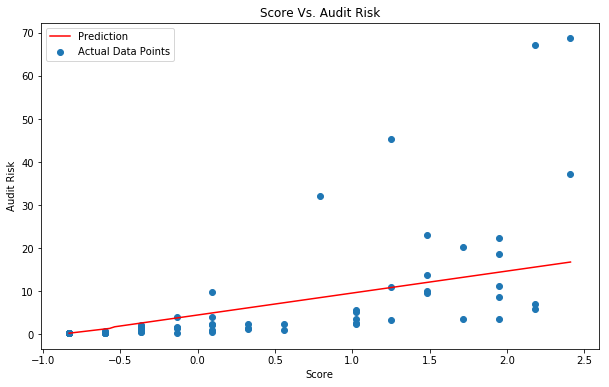

In [78]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

ada_reg = AdaBoostRegressor(LinearSVR(), n_estimators=100, learning_rate=0.3, random_state=0)
ada_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = ada_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

## iv) Gradient Boosting


<font color=tomato size=3>1. Training on Gradient Boosting algorithm</font>

In [79]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

print('Train score with Adaboost: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(gbrt.score(X_test, y_test)))

Train score with Adaboost: 0.92
Test score with Adaboost: 0.92



- Adjusting for different max_depth=3

In [80]:
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

print('Train score with Adaboost: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(gbrt.score(X_test, y_test)))

Train score with Adaboost: 0.97
Test score with Adaboost: 0.96



<font color=tomato size=3> 2. Finding best parameteters using GridSearch Cross Validation </font>

In [81]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [3,10,100,200,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(GradientBoostingRegressor(random_state=42,max_depth=3),param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'learning_rate': 0.3, 'n_estimators': 100}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

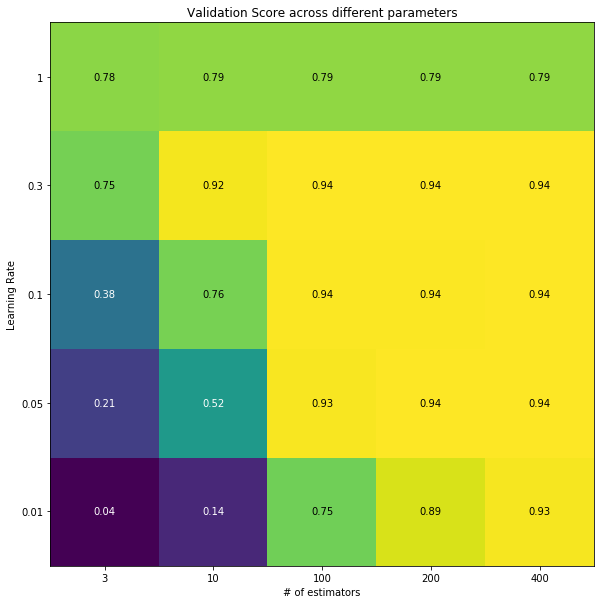

In [82]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Learning Rate',
                      yticklabels=param_dist['learning_rate'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.9999584738979438
Test score: 0.9838896106309052


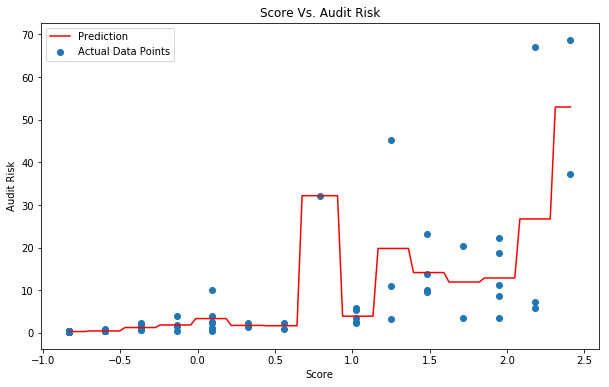

In [83]:
print('Train score: {}'.format(gs.score(X_train,y_train)))
print('Test score: {}'.format(gs.score(X_test,y_test)))

X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

gb = GradientBoostingRegressor(max_depth=3, n_estimators=400, learning_rate=0.1, random_state=42)
gb.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = gb.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

# Using PCA

In [84]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
#Making principal components that explain 95% of the variance in the data

X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

In [85]:
X_train1.shape

(611, 10)

In [86]:
print('Variance Explained by each Principal Component: \n{}\n\n'.format(pca.explained_variance_))
print('Percentage variance Explained by each Principal Component in the data:\n{}\n\n'.format(pca.explained_variance_ratio_))
print('Number of principal Components: {}'.format(pca.n_components_))

Variance Explained by each Principal Component: 
[6.56133195 2.26468335 1.56575222 1.35971847 1.14541403 0.95967488
 0.87653687 0.69970101 0.61157682 0.36284926]


Percentage variance Explained by each Principal Component in the data:
[0.38532902 0.13299864 0.09195233 0.07985253 0.06726702 0.05635907
 0.0514766  0.04109152 0.03591623 0.02130914]


Number of principal Components: 10


# PCA
## 1.) Bagging 

- <font color=maroon size=4> Bagging with Decision Tree </font>

 <font color=tomato size=3>1. Training on a single Decision Tree and then using Aggregate Bootstraping</font>



In [87]:

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
bag_reg = BaggingRegressor(dt, n_estimators=500, max_samples=200, bootstrap=True, random_state=0,oob_score=True)

bag_reg.fit(X_train1, y_train)
dt.fit(X_train1,y_train)
y_pred = bag_reg.predict(X_test1)

print('Train score with bagging: {:.2f}'.format(bag_reg.score(X_train1, y_train)))
print('Test score with bagging: {:.2f}\n'.format(bag_reg.score(X_test1, y_test)))
print('Train score decision Tree: {:.2f}'.format(dt.score(X_train1, y_train)))
print('Test score decision Tree: {:.2f}\n'.format(dt.score(X_test1, y_test)))
print('Out of Bag score: {:.2f}'.format(bag_reg.oob_score_))


Train score with bagging: 0.90
Test score with bagging: 0.84

Train score decision Tree: 1.00
Test score decision Tree: 0.82

Out of Bag score: 0.81


- With Decision Tree , we are getting a Train score of 1 and a test score 0f 0.87, clearly the model is overfitting the data
- Using Bagging, we are getting Train score 0f 0.90 and test score of 0.84 which is far more generalized than what we got with a single decision tree.
- Model has not improved with PCA, but let's see if it improves once fine tuned

<font color=tomato size=3> 2. Finding best parameteters for Bagging of Decision Tree Regressor using GridSearch Cross Validation </font>

In [88]:

from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(random_state=0),bootstrap=True, oob_score=True, random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train1, y_train)
print('Best parameters {}'.format(gs.best_params_))



Best parameters {'max_samples': 300, 'n_estimators': 100}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>


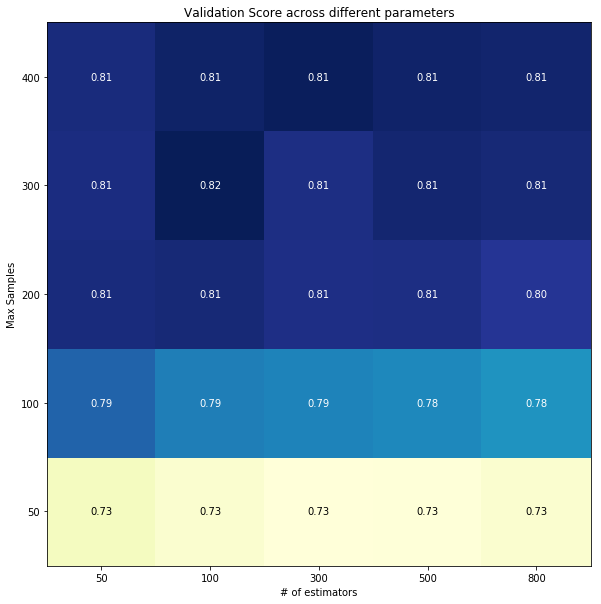

In [89]:

import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="YlGnBu") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()


<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>



Train score: 0.9279103132327443
Test score: 0.8538736587749303


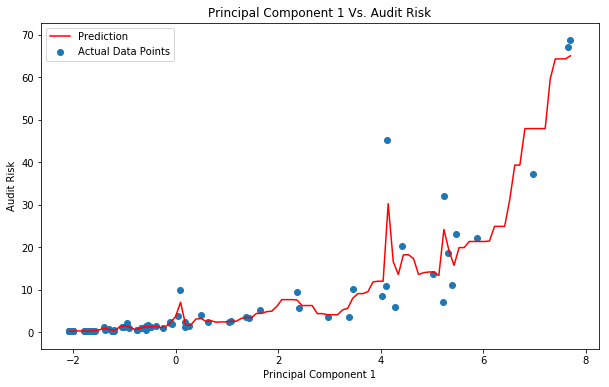

In [90]:
print('Train score: {}'.format(gs.score(X_train1,y_train)))
print('Test score: {}'.format(gs.score(X_test1,y_test)))

X_b = X_train1[:100,0].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(DecisionTreeRegressor(random_state=0), n_estimators=100, bootstrap=True, 
                           random_state=0,oob_score=True)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Audit Risk')
plt.title('Principal Component 1 Vs. Audit Risk')
plt.show()



<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

- <font color=maroon size=4> Bagging with KNN after PCA</font>

 <font color=tomato size=3>1. Training on a single KNN and then using Aggregate Bootstraping</font>


In [91]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(3)
bag_reg = BaggingRegressor(knn, n_estimators=500, bootstrap=True, random_state=0,oob_score=True)

bag_reg.fit(X_train1, y_train)
knn.fit(X_train1,y_train)

print('Train score with bagging: {:.2f}'.format(bag_reg.score(X_train1, y_train)))
print('Test score with bagging: {:.2f}\n'.format(bag_reg.score(X_test1, y_test)))
print('Train score KNN: {:.2f}'.format(knn.score(X_train1, y_train)))
print('Test score KNN: {:.2f}\n'.format(knn.score(X_test1, y_test)))
print('Out of Bag score: {:.2f}'.format(bag_reg.oob_score_))

Train score with bagging: 0.88
Test score with bagging: 0.86

Train score KNN: 0.87
Test score KNN: 0.87

Out of Bag score: 0.74


- With KNN, we are getting a Train score of 0.89 and a test score 0f 0.73, clearly the model is underfitting the data
- Using Bagging, we are getting Train score of 0.90 and test score of 0.74 which shows a slight improvement in test score but we need to find the best parameters to fine tune the model

<font color=tomato size=3> 2. Finding best parameteters for Bagging of KNN Regressor using GridSearch Cross Validation </font>

In [92]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(KNeighborsRegressor(3),bootstrap=True, oob_score=True, random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train1, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 400, 'n_estimators': 500}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

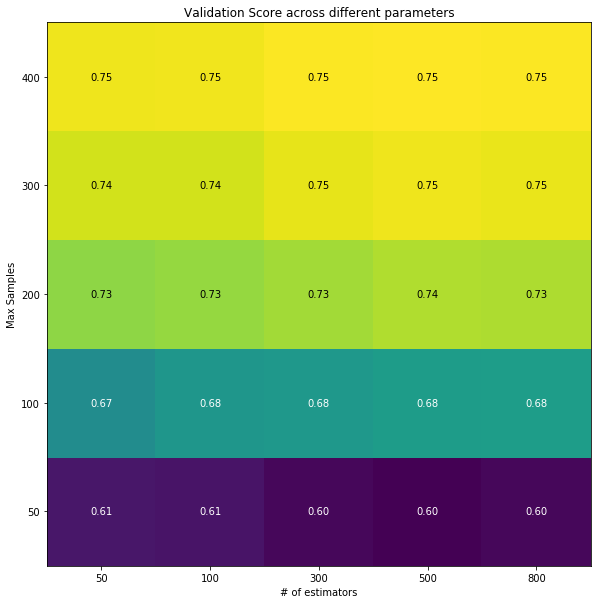

In [93]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.8428844493822042
Test score: 0.8332701634792923


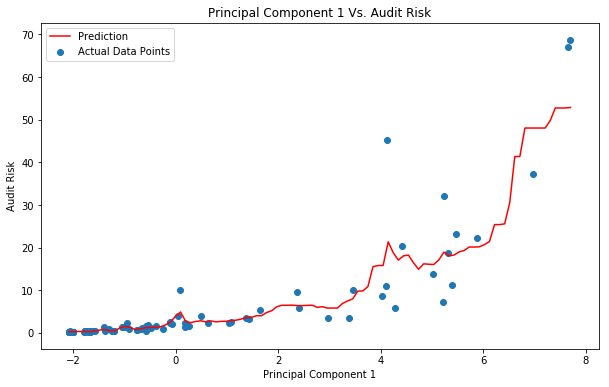

In [94]:
print('Train score: {}'.format(gs.score(X_train1,y_train)))
print('Test score: {}'.format(gs.score(X_test1,y_test)))

X_b = X_train1[:100,0].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(KNeighborsRegressor(3), n_estimators=500, bootstrap=True, 
                           random_state=0,oob_score=True)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Audit Risk')
plt.title('Principal Component 1 Vs. Audit Risk')
plt.show()


<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

# PCA
## 2.) Pasting

- <font color=green size=4> Pasting with Decision Tree </font>

 <font color=tomato size=3>1. Training on a single Decision Tree and then using Aggregate Bagging</font>

In [97]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
bag_reg = BaggingRegressor(dt, n_estimators=500, max_samples=200, bootstrap=False, random_state=0)

bag_reg.fit(X_train1, y_train)
dt.fit(X_train1,y_train)
y_pred = bag_reg.predict(X_test1)

print('Train score with pasting: {:.2f}'.format(bag_reg.score(X_train1, y_train)))
print('Test score with pasting: {:.2f}\n'.format(bag_reg.score(X_test1, y_test)))
print('Train score decision Tree: {:.2f}'.format(dt.score(X_train1, y_train)))
print('Test score decision Tree: {:.2f}\n'.format(dt.score(X_test1, y_test)))

Train score with pasting: 0.92
Test score with pasting: 0.86

Train score decision Tree: 1.00
Test score decision Tree: 0.82



- With single Decision tree, we are getting a Train score of 1 and a test score 0f 0.87, clearly the model is overfitting the data
- Using Pasting, we are getting Train score of 0.94 and test score of 0.91 which is far more generalized than what we got with a single Decision Tree
- Performance has improved after PCA as we are getting train and test scores closer to each other

<font color=tomato size=3> 2. Finding best parameteters for Pasting of Decision Tree Regressor using GridSearch Cross Validation </font>

In [95]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(random_state=0),bootstrap=False,random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train1, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 300, 'n_estimators': 100}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

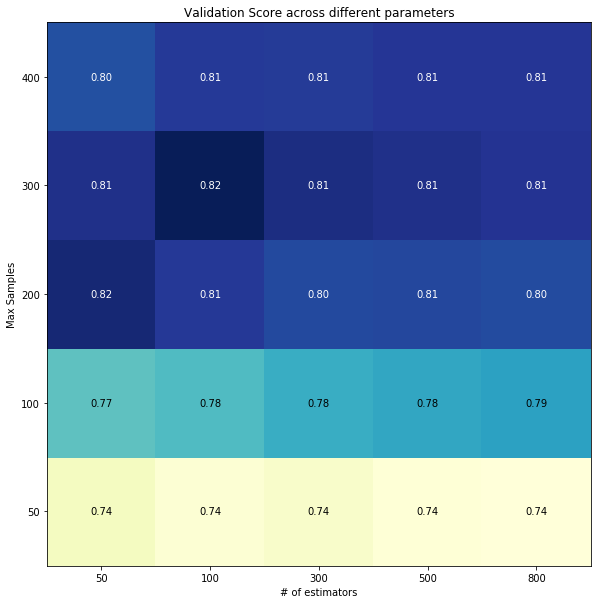

In [96]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="YlGnBu") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.9595910485836736
Test score: 0.8505805291851942


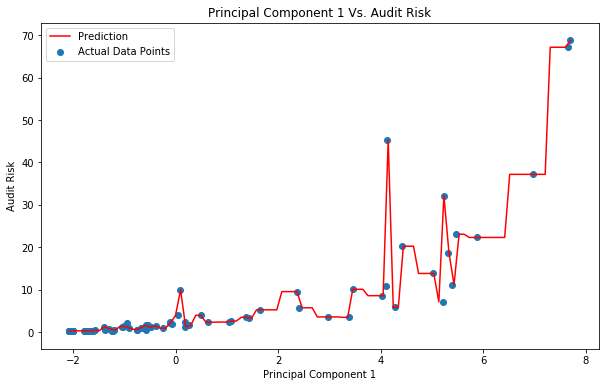

In [98]:
print('Train score: {}'.format(gs.score(X_train1,y_train)))
print('Test score: {}'.format(gs.score(X_test1,y_test)))

X_b = X_train1[:100,0].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(DecisionTreeRegressor(random_state=0), n_estimators=800, bootstrap=False, random_state=0)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Audit Risk')
plt.title('Principal Component 1 Vs. Audit Risk')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

- <font color=green size=4> Pasting with KNN after PCA</font>

 <font color=tomato size=3>1. Training on a single KNN and then using Pasting</font>


In [99]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(3)
bag_reg = BaggingRegressor(knn, n_estimators=500, bootstrap=False, random_state=0)

bag_reg.fit(X_train1, y_train)
knn.fit(X_train1,y_train)

print('Train score with pasting: {:.2f}'.format(bag_reg.score(X_train1, y_train)))
print('Test score with pasting: {:.2f}\n'.format(bag_reg.score(X_test1, y_test)))
print('Train score KNN: {:.2f}'.format(knn.score(X_train1, y_train)))
print('Test score KNN: {:.2f}\n'.format(knn.score(X_test1, y_test)))

Train score with pasting: 0.87
Test score with pasting: 0.87

Train score KNN: 0.87
Test score KNN: 0.87



- With single KNN, we are getting a Train score of 0.89 and a test score 0f 0.73, clearly the model is not fitting the data well
- Using Pasting, we are getting same results, which means pasting is not helping as bagging was.
- Generally we get better results with bagging as compared to pasting but let's tune the model and see if it improves somewhat
- Also after applying PCA, train and test scores have come closer

<font color=tomato size=3> 2. Finding best parameteters for Pasting of KNN Regressor using GridSearch Cross Validation </font>

In [100]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,300,500,800], 'max_samples':[50,100,200,300,400]}

gs = GridSearchCV(BaggingRegressor(KNeighborsRegressor(3),bootstrap=False, random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train1, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'max_samples': 300, 'n_estimators': 800}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

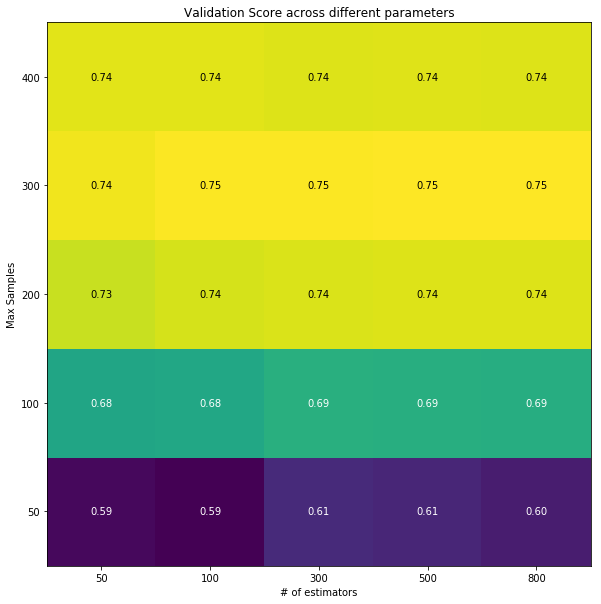

In [101]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Max Samples',
                      yticklabels=param_dist['max_samples'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.8239689188762971
Test score: 0.8157151501916363


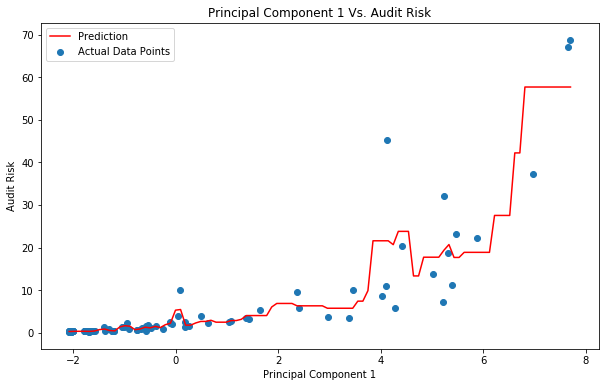

In [103]:
print('Train score: {}'.format(gs.score(X_train1,y_train)))
print('Test score: {}'.format(gs.score(X_test1,y_test)))

X_b = X_train1[:100,0].reshape(-1,1)
y_b = y_train[:100]

bag_reg = BaggingRegressor(KNeighborsRegressor(3), n_estimators=300, bootstrap=False, random_state=0)
bag_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = bag_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Audit Risk')
plt.title('Principal Component 1 Vs. Audit Risk')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

# PCA
## 3.) Adaboost


- <font color=purple size=4> Adaboost with Decision Tree </font>


<font color=tomato size=3>1. Training on a single Decision Tree and then using Adaboost</font>

In [104]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, learning_rate=0.3, random_state=0)
ada_reg.fit(X_train1, y_train)

dt=DecisionTreeRegressor(max_depth=3)
dt.fit(X_train1, y_train)
print('Train score with Adaboost: {:.2f}'.format(ada_reg.score(X_train1, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(ada_reg.score(X_test1, y_test)))
print('Train score with Decision Tree: {:.2f}'.format(dt.score(X_train1, y_train)))
print('Test score with Decision Tree: {:.2f}'.format(dt.score(X_test1, y_test)))

Train score with Adaboost: 0.92
Test score with Adaboost: 0.81

Train score with Decision Tree: 0.86
Test score with Decision Tree: 0.68


- With a weak learner Decision Tree with maxiumum depth 3, we are getting Train score of 0.85 and test score of 0.66.
- When put into adaboost regressor, with a low learning rate, it is more efficient and able to reduce bias/performance, getting train score of 0.90 and a test score 0f 0.80

<font color=tomato size=3> 2. Finding best parameteters Adaboost using GridSearch Cross Validation </font>

In [105]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,200,300,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), random_state=0), 
                  param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train1, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'learning_rate': 0.3, 'n_estimators': 50}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

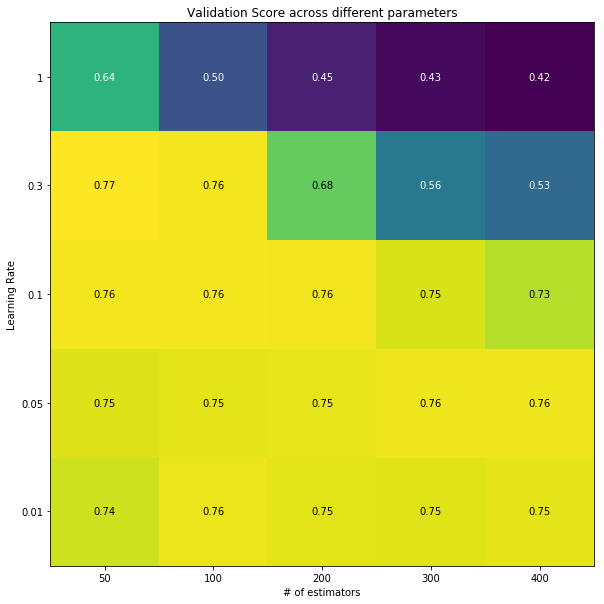

In [106]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Learning Rate',
                      yticklabels=param_dist['learning_rate'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.9301956811778171
Test score: 0.8323281065085915


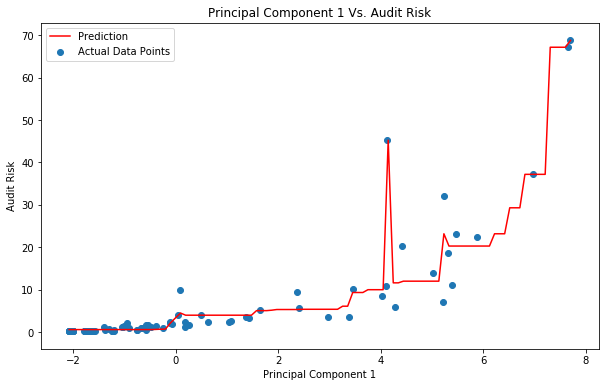

In [107]:
print('Train score: {}'.format(gs.score(X_train1,y_train)))
print('Test score: {}'.format(gs.score(X_test1,y_test)))

X_b = X_train1[:100,0].reshape(-1,1)
y_b = y_train[:100]

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=50, learning_rate=0.3, random_state=0)
ada_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = ada_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Audit Risk')
plt.title('Principal Component 1 Vs. Audit Risk')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

- <font color=purple size=4> Adaboost with Linear SVR after PCA</font>

<font color=tomato size=3>1. Training on Linear SVR and then using Adaboost</font>

In [108]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR

ada_reg = AdaBoostRegressor(LinearSVR(), n_estimators=100, learning_rate=0.1, random_state=0)
ada_reg.fit(X_train1, y_train)

svr=LinearSVR(random_state=0)
svr.fit(X_train1, y_train)
print('Train score with Adaboost: {:.2f}'.format(ada_reg.score(X_train1, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(ada_reg.score(X_test1, y_test)))
print('Train score with SVR: {:.2f}'.format(svr.score(X_train1, y_train)))
print('Test score with SVR: {:.2f}'.format(svr.score(X_test1, y_test)))

Train score with Adaboost: 0.83
Test score with Adaboost: 0.82

Train score with SVR: 0.78
Test score with SVR: 0.83


- Adaboost is giving us better results than a single Linear SVR, let's see if the performance can be improved by fine tuning the parameters

<font color=tomato size=3> 2. Finding best parameteters Adaboost using GridSearch Cross Validation </font>

In [109]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [50, 100,200,300,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(AdaBoostRegressor(LinearSVR(), random_state=0),param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train1, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'learning_rate': 0.01, 'n_estimators': 100}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

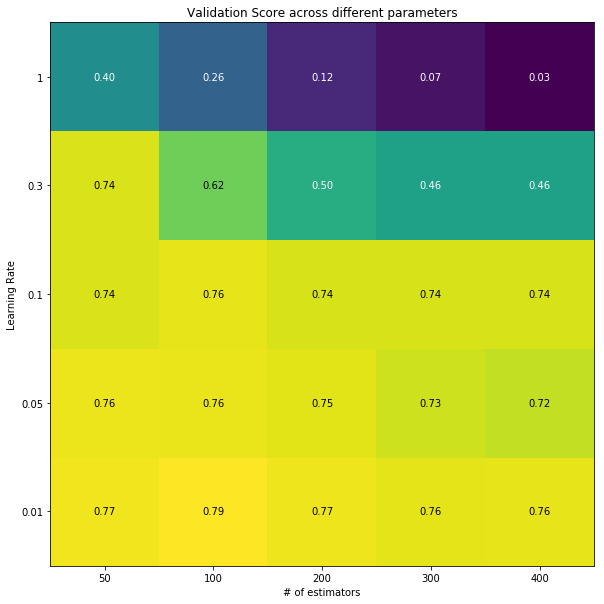

In [110]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Learning Rate',
                      yticklabels=param_dist['learning_rate'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.8213157152803313
Test score: 0.8673740035955461


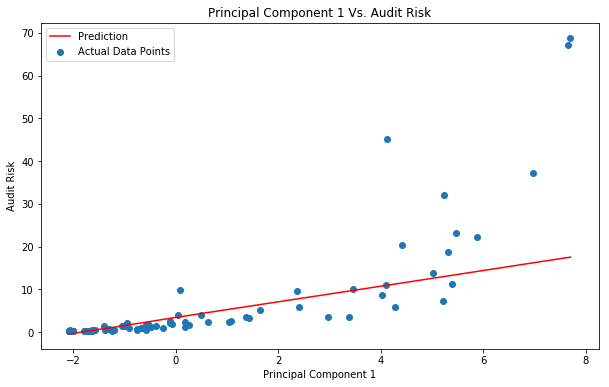

In [111]:
print('Train score: {}'.format(gs.score(X_train1,y_train)))
print('Test score: {}'.format(gs.score(X_test1,y_test)))

X_b = X_train1[:100,0].reshape(-1,1)
y_b = y_train[:100]

ada_reg = AdaBoostRegressor(LinearSVR(), n_estimators=50, learning_rate=0.01, random_state=0)
ada_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = ada_reg.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Audit Risk')
plt.title('Principal Component 1 Vs. Audit Risk')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

## iv) Gradient Boosting


<font color=tomato size=3>1. Training on Gradient Boosting algorithm</font>

In [112]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train1, y_train)

print('Train score with Adaboost: {:.2f}'.format(gbrt.score(X_train1, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(gbrt.score(X_test1, y_test)))

Train score with Adaboost: 0.88
Test score with Adaboost: 0.78



- Adjusting for different max_depth=3

In [113]:
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train1, y_train)

print('Train score with Adaboost: {:.2f}'.format(gbrt.score(X_train1, y_train)))
print('Test score with Adaboost: {:.2f}\n'.format(gbrt.score(X_test1, y_test)))

Train score with Adaboost: 0.95
Test score with Adaboost: 0.74



<font color=tomato size=3> 2. Finding best parameteters using GridSearch Cross Validation </font>

In [114]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'n_estimators': [3,10,100,200,400], 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

gs = GridSearchCV(GradientBoostingRegressor(random_state=42,max_depth=3),param_grid = param_dist, cv=5, n_jobs=-1)

gs.fit(X_train1, y_train)
print('Best parameters {}'.format(gs.best_params_))

Best parameters {'learning_rate': 0.1, 'n_estimators': 200}


<font color=tomato size=3> 3. Visualizing the Cross validation Results</font>

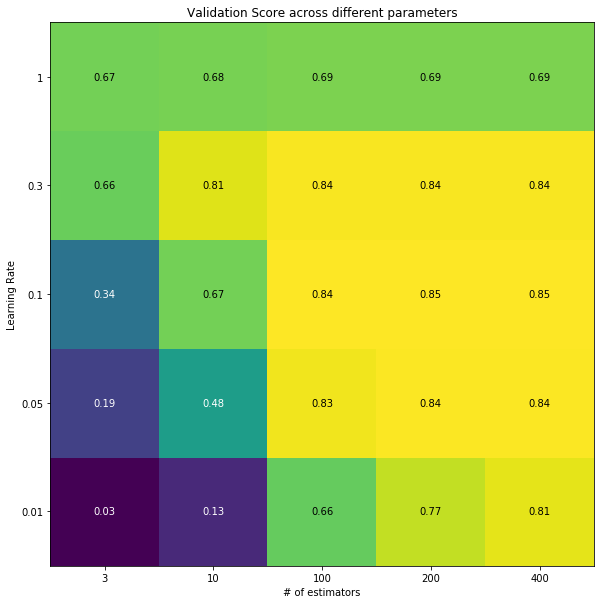

In [115]:
import mglearn
results = pd.DataFrame(gs.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='# of estimators', xticklabels=param_dist['n_estimators'], ylabel='Learning Rate',
                      yticklabels=param_dist['learning_rate'], cmap="viridis") #YlGnBu viridis
plt.title('Validation Score across different parameters')
plt.show()

<font color=tomato size=3> 4. Fitting the model with best parameters and Visualizing how it fits the data</font>

Train score: 0.9997150510773599
Test score: 0.9197461431188365


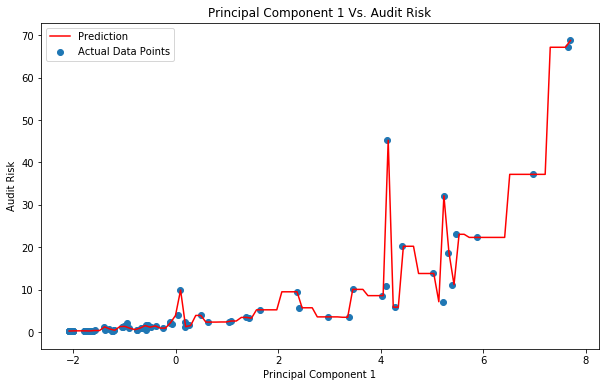

In [116]:
print('Train score: {}'.format(gs.score(X_train1,y_train)))
print('Test score: {}'.format(gs.score(X_test1,y_test)))

X_b = X_train1[:100,0].reshape(-1,1)
y_b = y_train[:100]

gb = GradientBoostingRegressor(max_depth=3, n_estimators=400, learning_rate=0.1, random_state=42)
gb.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = gb.predict(X_new)

plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Audit Risk')
plt.title('Principal Component 1 Vs. Audit Risk')
plt.show()

<font color=springgreen>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------

 # Comparing models before and after applying PCA and finding the best Regression model

## PCA

In [117]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
#Making principal components that explain 95% of the variance in the data

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape
print('Variance Explained by each Principal Component: \n{}\n\n'.format(pca.explained_variance_))
print('Percentage variance Explained by each Principal Component in the data:\n{}\n\n'.format(pca.explained_variance_ratio_))
print('Number of principal Components: {}'.format(pca.n_components_))

Variance Explained by each Principal Component: 
[6.56133195 2.26468335 1.56575222 1.35971847 1.14541403 0.95967488
 0.87653687 0.69970101 0.61157682 0.36284926]


Percentage variance Explained by each Principal Component in the data:
[0.38532902 0.13299864 0.09195233 0.07985253 0.06726702 0.05635907
 0.0514766  0.04109152 0.03591623 0.02130914]


Number of principal Components: 10


## i) Ridge

Text(0.5, 0, '$\\alpha$')

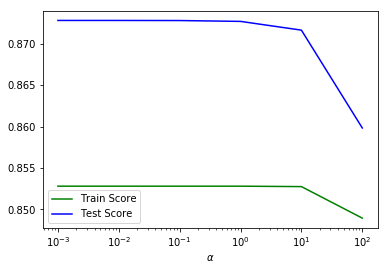

In [118]:
from  sklearn.linear_model import Ridge
# Ridge uses L2 Penalty

# Defining values for hyperparameter alpha
alpha = [0.001,0.01, 0.1, 1, 10, 100]

train_score_list = []
test_score_list = []

# Fitting models for different values of alpha
for i in alpha: 
    ridge = Ridge(i)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

plt.plot(alpha, train_score_list, c = 'g', label = 'Train Score')
plt.plot(alpha, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

With Increase in alpha, Regularization increases and we can see in the graph, with increase in alpha model becomes more and more restricted, and leads to underfitting. 
This graph suggests alpha=10 as optimal value. Let's find out the optimal values using Grid search
But before that let's find out how the importance of each feature, and see how it converges with each value on increasing alpha

In [119]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
print('Train score on best parameters {}'.format(ridge.score(X_train,y_train)))
print('Test score on best parameters {}'.format(ridge.score(X_test,y_test)))

Train score on best parameters 0.848948572461586
Test score on best parameters 0.8598272955341156


### Visualizing the results

Text(0.5, 1.0, 'PC1 Vs. Audit Risk')

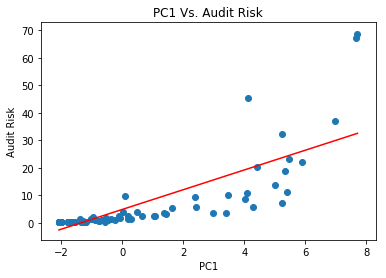

In [120]:
#PC1 and Audit_Risk
X_b = X_train[:100,0].reshape(-1,1)
y_b = y_train[:100]

ridge = Ridge(alpha=1)
ridge.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = ridge.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('PC1')
plt.ylabel('Audit Risk')
plt.title('PC1 Vs. Audit Risk')

## ii) Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()

regressor.fit(X_train, y_train)
print('Train Score {}'.format(regressor.score(X_train, y_train)))
print('Test Score {}\n'.format(regressor.score(X_test, y_test)))

print('linear model coeff (w): {}\n'.format(regressor.coef_))
print('linear model intercept (b): {:.3f}\n'.format(regressor.intercept_))
print('R-squared score (training): {:.3f}\n'.format(regressor.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(X_test, y_test)))

Train Score 0.8528031470424305
Test Score 0.8728034735415772

linear model coeff (w): [ 3.4272622   0.94239118  1.68893114 -0.76055959  2.26417142 -0.63659842
  2.34267888  0.8270253   1.87531493 -0.41706334]

linear model intercept (b): 4.903

R-squared score (training): 0.853

R-squared score (test): 0.873


### Visualizing the results

Text(0.5, 1.0, 'Score Vs. Audit Risk')

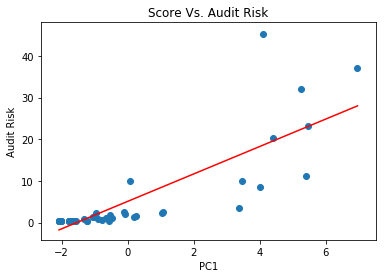

In [122]:
#Score and Audit_Risk
X_b = X_train[:50,0].reshape(-1,1)
y_b = y_train[:50]

regressor = LinearRegression()

regressor.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = regressor.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('PC1')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')

## iii) KNN

Mean squared error varying with k [13.202143802948397, 11.15253747463365, 10.990179453157928, 11.735619219844642, 13.40622420360442, 15.37941313222534, 16.38379344704655, 17.6386302241392, 19.463558313581945, 20.062275511984446, 20.32191948708638, 21.56922697419987, 22.216713225967805, 22.340363395945626]


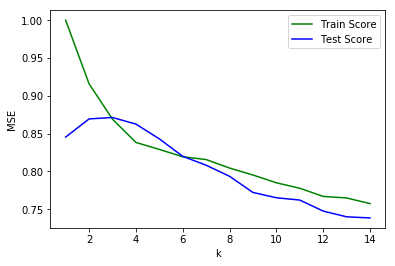

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_score_array = []
test_score_array = []
mean_squared=[]

for k in range(1,15):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
    mean_squared.append(mean_squared_error(y_test,knn.predict(X_test)))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print('Mean squared error varying with k {}'.format(mean_squared))


k=4 looks good here, achieving nearly 80% test accuracy

In [124]:
knn=KNeighborsRegressor(4)
knn.fit(X_train, y_train)
print('Train score on best parameters {}'.format(knn.score(X_train,y_train)))
print('Test score on best parameters {}'.format(knn.score(X_test,y_test)))

Train score on best parameters 0.8384161557323153
Test score on best parameters 0.8626680539844165


### Visualizing the results

Text(0.5, 1.0, 'Score Vs. Audit Risk')

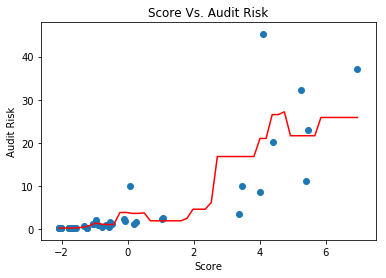

In [125]:
#Score and Audit_Risk
X_b = X_train[:50,0].reshape(-1,1)
y_b = y_train[:50]

knn = KNeighborsRegressor(4)
knn.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')

## iv) Polynomial Regression

In [128]:
from  sklearn.preprocessing  import PolynomialFeatures
lreg=LinearRegression()
poly = PolynomialFeatures(2) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
print('Train score on best parameters {}'.format(lreg.score(X_train_poly,y_train)))
print('Test score on best parameters {}'.format(lreg.score(X_test_poly,y_test)))

Train score on best parameters 0.9911255995658523
Test score on best parameters 0.9859259313372647


### Visualizing the results

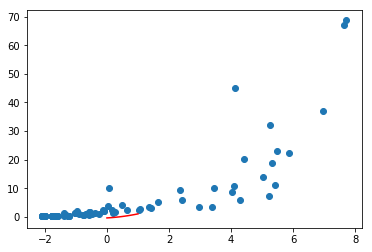

In [129]:
X_train_1 = X_train[:100,0].reshape(-1,1)
y_train1=y_train[:100]
plt.scatter(X_train_1,y_train1)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train1)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

plt.plot(x_axis, y_predict, c = 'r')


## v) Lasso

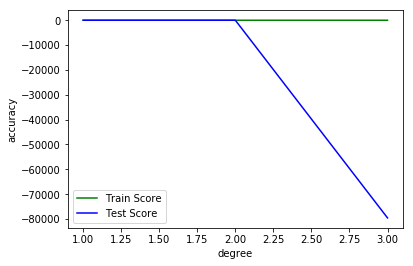

In [130]:
from  sklearn.preprocessing  import PolynomialFeatures

lreg=LinearRegression()

train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)  # n is the degree here, n=1 is same as linear regression
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

Best performance is at degree 2 but going for higher degree is resulting in overfitting
Let's validate the resuls using cross validation

In [131]:
lasso = Lasso(alpha=1,max_iter=1000)
lasso.fit(X_train, y_train)
print('Train score on best parameters {}'.format(lasso.score(X_train,y_train)))
print('Test score on best parameters {}'.format(lasso.score(X_test,y_test)))

Train score on best parameters 0.7957213032636588
Test score on best parameters 0.7789552603756305


### Visualizing the results

Text(0.5, 1.0, 'PC1 Vs. Audit Risk')

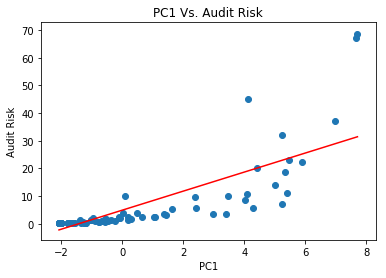

In [132]:
#Score and Audit_Risk
X_b = X_train[:100,0].reshape(-1,1)
y_b = y_train[:100]

lasso = Lasso(alpha=1,max_iter=1000)
lasso.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = lasso.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('PC1')
plt.ylabel('Audit Risk')
plt.title('PC1 Vs. Audit Risk')

## vi) Linear SVM¶

In [133]:
from sklearn.svm import LinearSVR
linear_svr = LinearSVR()

linear_svr.fit(X_train, y_train) #by default c=1
print("Coefficient shape: ", linear_svr.coef_.shape)
print("Intercept shape: ", linear_svr.intercept_.shape)

print('Train Score : {}'.format(linear_svr.score(X_train,y_train)))
print('Test Score : {}'.format(linear_svr.score(X_test,y_test)))


Coefficient shape:  (10,)
Intercept shape:  (1,)
Train Score : 0.7829199639470388
Test Score : 0.8336296988798588


In [134]:
linear_svr = LinearSVR(C=0.1)
linear_svr.fit(X_train, y_train)
print('Train score on best parameters {}'.format(linear_svr.score(X_train,y_train)))
print('Test score on best parameters {}'.format(linear_svr.score(X_test,y_test)))

Train score on best parameters 0.7704969132494535
Test score on best parameters 0.8041785591177366


### Visualizing the results

Text(0.5, 1.0, 'PC1 Vs. Audit Risk')

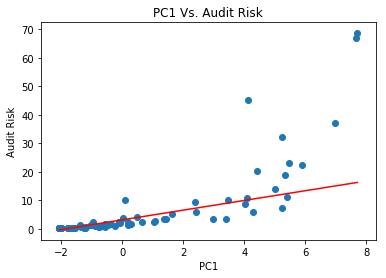

In [135]:
X_b = X_train[:100,0].reshape(-1,1)
y_b = y_train[:100]

linear_svr = LinearSVR(C=10)
linear_svr.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = linear_svr.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('PC1')
plt.ylabel('Audit Risk')
plt.title('PC1 Vs. Audit Risk')

## vii) SVM with kernal trick¶

In [136]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(X_train, y_train) #fitting on default parameters

print('Train Score : {}'.format(svr.score(X_train,y_train)))
print('Test Score : {}'.format(svr.score(X_test,y_test)))

Train Score : 0.45899938364305404
Test Score : 0.43160892704307763


Default value of parameters in giving us an underfit model

In [137]:
# Applying Grid Search to find the best parameters
svr = SVR(kernel='rbf')

from sklearn.model_selection import GridSearchCV

## We are creating a grid for which all n_neighbors values are to be used for cross validation
parameters = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100],
      'C':[0.001, 0.01, 0.1, 1, 10, 100]}

## Using Grid search for exhaustive searching
grid_search = GridSearchCV(svr,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


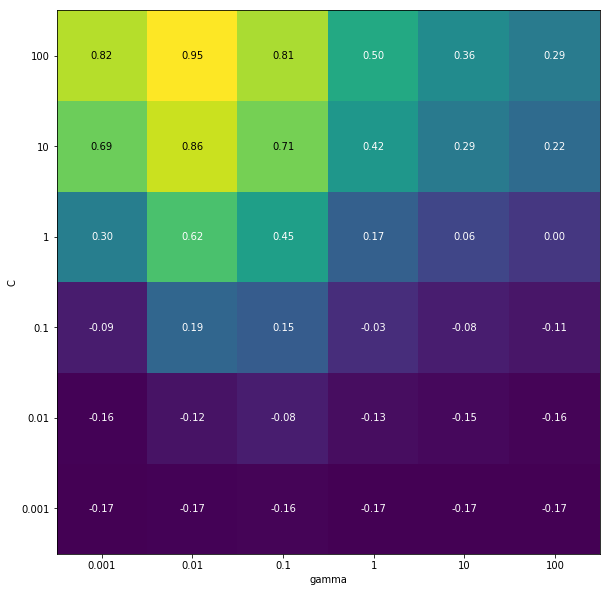

In [138]:
import mglearn
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=parameters['gamma'], ylabel='C', yticklabels=parameters['C'], cmap="viridis")

### Visualizing the results

Text(0.5, 1.0, 'PC1 Vs. Audit Risk')

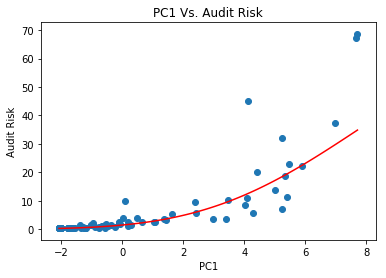

In [139]:
X_b = X_train[:100,0].reshape(-1,1)
y_b = y_train[:100]

svr=SVR(kernel='rbf',C=100,gamma=0.01)
svr.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = svr.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('PC1')
plt.ylabel('Audit Risk')
plt.title('PC1 Vs. Audit Risk')

In [140]:
svr=SVR(kernel='rbf',C=100,gamma=0.01)
svr.fit(X_train, y_train)
print('Train Score : {}'.format(svr.score(X_train,y_train)))
print('Test Score : {}'.format(svr.score(X_test,y_test)))


Train Score : 0.9974242004470124
Test Score : 0.9945370361043225


## viii) Decision Tree

In [141]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
print('Train Score {}'.format(tree.score(X_train,y_train)))
print('Test Score {}'.format(tree.score(X_test,y_test)))

Train Score 0.9999999999274927
Test Score 0.7294490917098604


In [144]:
tree=DecisionTreeRegressor()

parameters={'max_depth':[2,5,10,20,50,100], 'min_samples_split':[2,10,20,50,100],'max_leaf_nodes':[30,100,150,200,300,400,500,700,800]}

grid_search = GridSearchCV(tree,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_
print(best_parameters)


{'max_depth': 100, 'max_leaf_nodes': 700, 'min_samples_split': 2}


### Visualizing the results

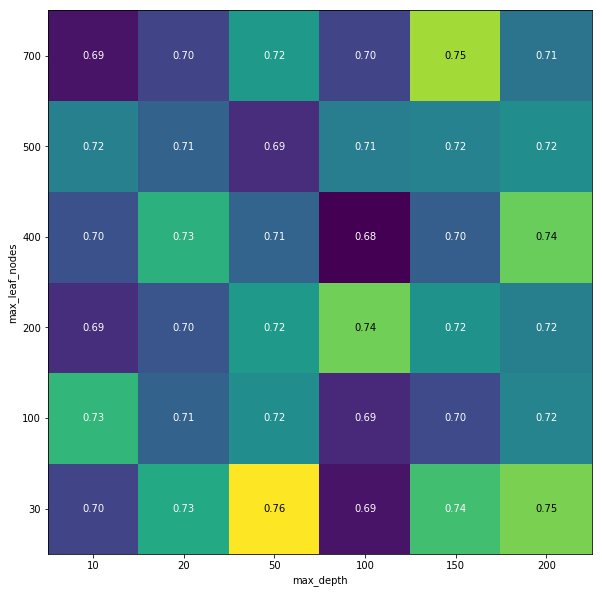

In [145]:
tree=DecisionTreeRegressor(min_samples_split=2)

parameters={'max_depth':[10,20,50,100,150,200],'max_leaf_nodes':[30,100,200,400,500,700]}

grid_search = GridSearchCV(tree,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='max_depth', xticklabels=parameters['max_depth'], ylabel='max_leaf_nodes', yticklabels=parameters['max_leaf_nodes'], cmap="viridis")


## ix) Random Forest

In [146]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.9688558649096696
Test Score 0.8720511486828215


### Finding Best parameters

Best Accuracy is 0.8203271998196403
Best Parameters {'max_depth': 100, 'n_estimators': 20}


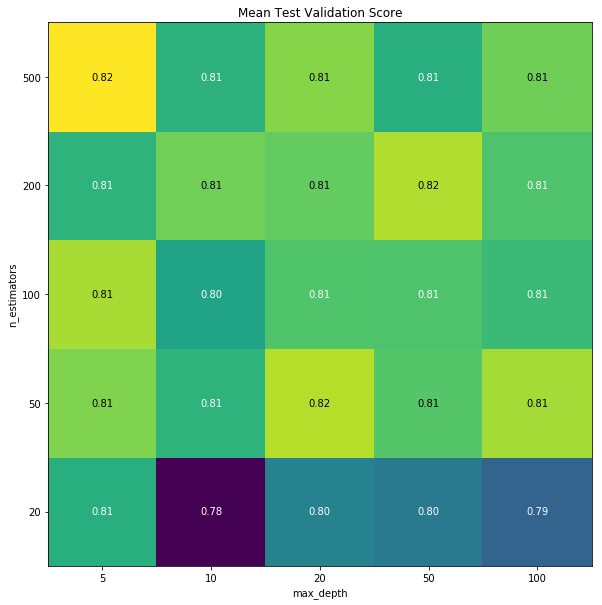

In [147]:
forest= RandomForestRegressor()

parameters={'max_depth':[5,10,20,50,100], 'n_estimators':[20,50,100,200,500]}

grid_search = GridSearchCV(forest,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy is {}'.format(best_accuracy))
print('Best Parameters {}'.format(best_parameters))


results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
plt.title('Mean Test Validation Score')
mglearn.tools.heatmap(scores, xlabel='max_depth', xticklabels=parameters['max_depth'], ylabel='n_estimators', yticklabels=parameters['n_estimators'], cmap="viridis")



In [148]:
forest= RandomForestRegressor(max_depth=50,n_estimators=200)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,forest.predict(X_test))))

Train Score 0.9785544409519233
Test Score 0.8760267013393568
Mean Squared Error : 10.594064008561352


## Deep Learning

## i) ANN

In [150]:
X_train=standard_scaler.fit_transform(X_train_unscaled)
X_test=standard_scaler.transform(X_test_unscaled)


In [156]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(32,input_dim = 17 ,kernel_initializer='normal',activation = 'relu'))
#hidden layers
model1.add(Dense(16,input_dim = 12 ,kernel_initializer='normal',activation = 'relu'))
#output layer
model1.add(Dense(1, activation = None))

#step 2: make computational graph - compile
model1.compile(loss= 'mse' , optimizer = 'adam',metrics = ['mse'] )

#step 3: train the model - fit
history=model1.fit(X_train, y_train, epochs = 50, batch_size = 300)

#step 4: evaluation
print(model1.evaluate(X_train, y_train))
print(model1.evaluate(X_test, y_test))

Epoch 1/50
611/611 [==============================] - 0s 214us/sample - loss: 138.4309 - mean_squared_error: 138.4309
Epoch 2/50
611/611 [==============================] - 0s 8us/sample - loss: 137.8275 - mean_squared_error: 137.8275
Epoch 3/50
611/611 [==============================] - 0s 8us/sample - loss: 137.2113 - mean_squared_error: 137.2113
Epoch 4/50
611/611 [==============================] - 0s 7us/sample - loss: 136.5277 - mean_squared_error: 136.5277
Epoch 5/50
611/611 [==============================] - 0s 7us/sample - loss: 135.8312 - mean_squared_error: 135.8312
Epoch 6/50
611/611 [==============================] - 0s 7us/sample - loss: 135.0737 - mean_squared_error: 135.0737
Epoch 7/50
611/611 [==============================] - 0s 7us/sample - loss: 134.2407 - mean_squared_error: 134.2407
Epoch 8/50
611/611 [==============================] - 0s 7us/sample - loss: 133.3083 - mean_squared_error: 133.3083
Epoch 9/50
611/611 [==============================] - 0s 8us/sample - 

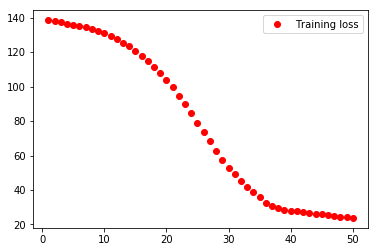

In [157]:
#history = model1.fit(X_train, y_train, epochs = 50, batch_size = 300)
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

## ii) MLP

In [161]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 17, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = None))

#step 2: compile the model
model2.compile(loss= 'mse' , optimizer = 'adam',metrics = ['mse'] )

#step 3: train the model
history=model2.fit(X_train, y_train, epochs = 30, batch_size = 150)

#step 4: evaluate
print(model1.evaluate(X_train, y_train))
print(model1.evaluate(X_test, y_test))

Epoch 1/30
611/611 [==============================] - 0s 281us/sample - loss: 161.3343 - mean_squared_error: 161.3343
Epoch 2/30
611/611 [==============================] - 0s 13us/sample - loss: 156.1988 - mean_squared_error: 156.1989
Epoch 3/30
611/611 [==============================] - 0s 11us/sample - loss: 151.8054 - mean_squared_error: 151.8054
Epoch 4/30
611/611 [==============================] - 0s 10us/sample - loss: 148.0036 - mean_squared_error: 148.0036
Epoch 5/30
611/611 [==============================] - 0s 11us/sample - loss: 144.6751 - mean_squared_error: 144.6751
Epoch 6/30
611/611 [==============================] - 0s 11us/sample - loss: 141.6188 - mean_squared_error: 141.6188
Epoch 7/30
611/611 [==============================] - 0s 11us/sample - loss: 138.3555 - mean_squared_error: 138.3555
Epoch 8/30
611/611 [==============================] - 0s 11us/sample - loss: 135.2575 - mean_squared_error: 135.2575
Epoch 9/30
611/611 [==============================] - 0s 11us/s

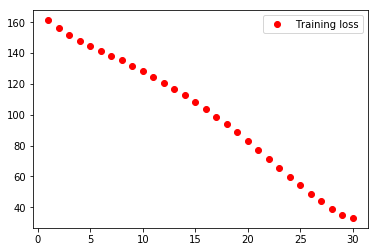

In [162]:
#history = model1.fit(X_train, y_train, epochs = 50, batch_size = 300)
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Comparing PCA results

In [163]:
PC= pd.ExcelFile(r'C:\Users\nick2\Desktop\MS\Sem-2\ML\Project 2\Regression_Results_PCA.xlsx')
PC = pd.read_excel(PC)
PC

,Model,Train Score,Test Score,PCA Train Score,PCA Test Score
0,KNN,0.8652,0.7851,0.830,0.860
1,Linear Regression,0.8900,0.8200,0.870,0.850
2,Ridge,0.8700,0.8300,0.840,0.850
3,Lasso,0.8400,0.8000,0.790,0.770
4,Polynomial Regression,1.0000,0.9900,0.990,0.980
5,Linear SVR,0.7900,0.7400,0.800,0.770
6,Kernelized SVR,0.9900,0.9600,0.997,0.994
7,Decision Tree,0.9900,0.9300,0.990,0.940
8,Random Forest,0.9894,0.9241,0.970,0.870


- For most of the models, using Principal component analysis hasn't improved the accuracy
- KNN, Linear Regression, Ridge, Lasso, Polynomial Regression, Linear SVR, Kernelized SVR and Decision Tree models have improved after PCA as difference between Train and Test score have reduced
- Random Forest's performance has decreased upon implementing PCA

    - For some models, PCA has helped in improving performance, but the improvement is slight, reason being, we had already dropped correlated columns and done feature selection on our end as much as we could. If we had not dropped the correlated features earlier and did feature extraction using PCA, the model performance would have improved significantly after using PCA. But because we had already adjusted for multicollinearity and all, our model had already reached almost its peak performance before applying PCA, so that is why most models are not showing significant improvement after PCA

# Finding Best Ensemble Model

In [165]:
xlsx = pd.ExcelFile(r'C:\Users\nick2\Desktop\MS\Sem-2\ML\Project 2\Regression_Results.xlsx')
df = pd.read_excel(xlsx)
df

,Model,Train Score,Test Score
0,Bagging(Decision Tree),0.972,0.953
1,Bagging(KNN),0.840,0.830
2,Pasting(Decision Tree),0.970,0.950
3,Pasting(KNN),0.848,0.843
4,Adaboost(Decision Tree),0.950,0.920
5,Adaboost(SVM),0.840,0.870
6,Gradient Boosting,0.999,0.980


## - Best Ensemble model would be Gradient Boosting
## - With Deep Learning models we are able to achieve a Mean Squared Error of 16.93 which has improved significantly with ANN